In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from termcolor import colored
import scipy.stats

In [2]:
"""datasets"""

home = '/scratch/pdenblaauwen/rootzone/LS3MIP/evspsbl/Monthly_2001-2012/same_resolution/All_months/West_Africa/'
home_b = '/scratch/pdenblaauwen/rootzone/Benchmark_evaporation_products/'

LFE_monthly = xr.open_dataset(home_b + 'LandFlux-EVAL/Monthly/LandFluxEVAL.merged.89-05.monthly.all.nc' , engine = 'netcdf4')
SA = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012.nc' , engine = 'netcdf4')
DOLCE_v3_monthly = xr.open_dataset(home_b + 'DOLCE_v3/DOLCE_v3_2001-2012_WA.nc' , engine = 'netcdf4')
FBP_monthly = xr.open_dataset(home_b + 'FLUXCOMRS_PML_BESS_chandrakant/FLUXCOM_BESS_PML_monthly_2001-2012_WA.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'UKESM1-0-LL_land-hist_r1i1p1f2_200101-201212_WA.nc' , engine = 'netcdf4')
EC_Earth3_veg = xr.open_dataset(home + 'EC-Earth3-Veg_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CESM2 = xr.open_dataset(home + 'CESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'CMCC-ESM2_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
ESM_1_1 = xr.open_dataset(home + 'E3SM-1-1_land-hist_r1i1p11f1_200101-201212_WA.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'HadGEM3-GC31-LL_land-hist_r1i1p1f3_200101-201212_WA.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'IPSL-CM6A-LR_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'MIROC6_land-hist_r1i1p1f1_200101-201212_WA.nc' , engine = 'netcdf4')

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

DOLCE_v3_monthly = DOLCE_v3_monthly * factor
UKESM1_0_LL = UKESM1_0_LL.evspsbl * t_day
EC_Earth3_veg = EC_Earth3_veg.evspsbl * t_day
CESM2 = CESM2.evspsbl * t_day
CMCC_ESM2 = CMCC_ESM2.evspsbl * t_day
E3SM_1_1 = ESM_1_1.evspsbl * t_day
HadGEM3_GC31_LL = HadGEM3_GC31_LL.evspsbl * t_day
IPSL_CM6A_LR = IPSL_CM6A_LR.evspsbl * t_day
MIROC6 = MIROC6.evspsbl * t_day

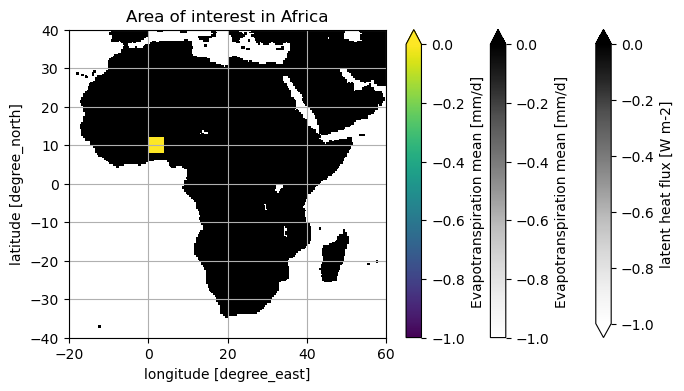

In [3]:
"""Lat: 8:12, Lon: 0:4""" 

plt.figure(figsize = (8 , 4))
SA.hfls[1 , : , :].plot(cmap = 'Greys' , vmin = -1 , vmax = 0)
LFE_monthly.ET_mean[1 ].plot(cmap = 'Greys' , vmin = -1 , vmax = 0)
LFE_monthly.ET_mean[1 , 8+90:12+90 , 180:4+180].plot(cmap = 'viridis' , vmin = -1 , vmax = 0)
plt.title(f'Area of interest in Africa')
plt.ylim(-40 , 40)
plt.xlim( -20 , 60)

plt.grid()

In [4]:
"""Mean of the area"""

t = 120  #2001 - 2010

dpm = [31, 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 29 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31,
      31 , 28 , 31 , 30 , 31 , 30 , 31 , 31 , 30 , 31 , 30 , 31]

#ET_mean_LFE = np.zeros(t)
ET_mean_DOLCE_v3 = np.zeros(t)
ET_mean_FBP = np.zeros(t)
ET_mean_UKESM1_0_LL = np.zeros(t)
ET_mean_EC_Earth3_veg = np.zeros(t)
ET_mean_CESM2 = np.zeros(t)
ET_mean_CMCC_ESM2 = np.zeros(t)
ET_mean_E3SM_1_1 = np.zeros(t)
ET_mean_HadGEM3_GC31_LL = np.zeros(t)
ET_mean_IPSL_CM6A_LR = np.zeros(t)
ET_mean_MIROC6 = np.zeros(t)

for i in range(t):
    #ET_mean_LFE[i] = LFE_EB.ET_mean[i + 144 , : , :].mean()
    ET_mean_DOLCE_v3[i] = DOLCE_v3_monthly.hfls[i , : , :].mean() * dpm[i]
    ET_mean_FBP[i] = FBP_monthly.Evaporation[i , : , :].mean() * dpm[i]
    ET_mean_UKESM1_0_LL[i] = UKESM1_0_LL[i , : , :].mean() * dpm[i]
    ET_mean_EC_Earth3_veg[i] = EC_Earth3_veg[i , : , :].mean()  * dpm[i]
    ET_mean_CESM2[i] = CESM2[i , : , :].mean() * dpm[i]
    ET_mean_CMCC_ESM2[i] = CMCC_ESM2[i , : , :].mean()  * dpm[i]
    ET_mean_E3SM_1_1[i] = E3SM_1_1[i , : , :].mean() * dpm[i]
    ET_mean_HadGEM3_GC31_LL[i] = HadGEM3_GC31_LL[i , : , :].mean() * dpm[i]
    ET_mean_IPSL_CM6A_LR[i] = IPSL_CM6A_LR[i , : , :].mean() * dpm[i]
    ET_mean_MIROC6[i] = MIROC6[i , : , :].mean() * dpm[i]

In [5]:
"""Precipitation data"""

home = '/scratch/pdenblaauwen/rootzone/GSWP3/Monthly'

Prec_monthly_2001_2010 = xr.open_dataset(home +  '/pr_gswp3_2001_2010_monthly_WA.nc' , engine = 'netcdf4')

P_mean = np.zeros(t)

for i in range(len(P_mean)):
    P_mean[i] = Prec_monthly_2001_2010.pr[i].mean() * t_day * dpm[i]
    
p_01_10 = np.sum(P_mean[0:12]) + np.sum(P_mean[12:24]) + np.sum(P_mean[24:36]) + np.sum(P_mean[36:48]) + np.sum(P_mean[48:60]) + np.sum(P_mean[60:72]) + np.sum(P_mean[72:84]) + np.sum(P_mean[84:96]) + np.sum(P_mean[96:108]) + np.sum(P_mean[108:120])
print(f'The average yearly precipitation is equal to: {p_01_10/10:.2f} mm')

The average yearly precipitation is equal to: 1118.53 mm


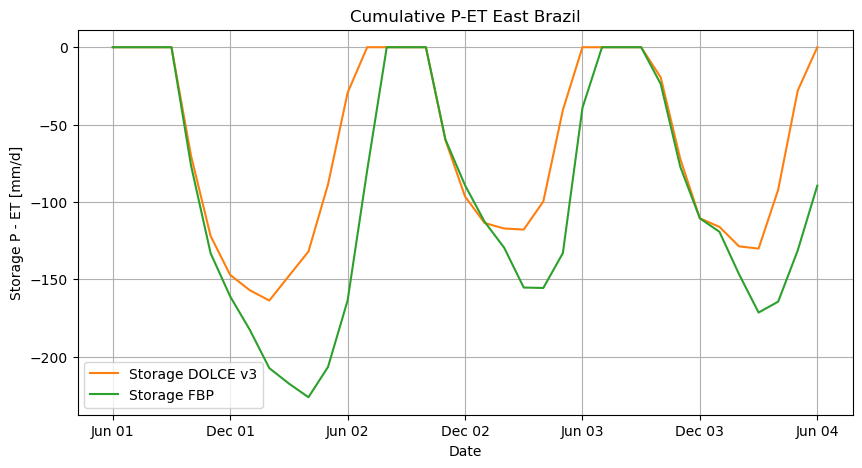

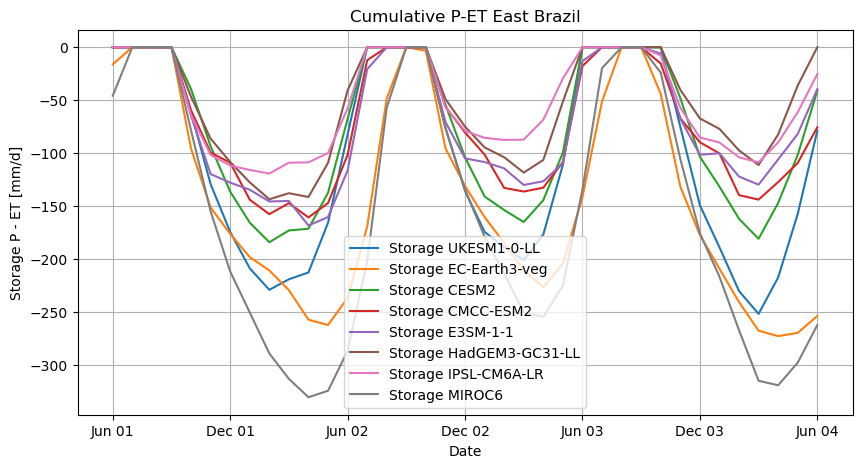

In [6]:
"""Storage S1"""

t = 120

S1_LFE = np.zeros(t)
S1_DOLCE_v3 = np.zeros(t)
S1_FBP = np.zeros(t)
S1_UKEMS1_0_LL = np.zeros(t)
S1_EC_Earth3_veg = np.zeros(t)
S1_UKESM1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_E3SM_1_1 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    #S1_LFE[i] = S1_LFE[i - 1] + P_mean[i] - ET_mean_LFE[i]
    S1_DOLCE_v3[i] = S1_DOLCE_v3[i - 1] + (P_mean[i] - ET_mean_DOLCE_v3[i])
    S1_FBP[i] = S1_FBP[i - 1] + (P_mean[i] - ET_mean_FBP[i])
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_EC_Earth3_veg[i] = S1_EC_Earth3_veg[i - 1] + (P_mean[i] - ET_mean_EC_Earth3_veg[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_E3SM_1_1[i] = S1_E3SM_1_1[i - 1] + (P_mean[i] - ET_mean_E3SM_1_1[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    if S1_DOLCE_v3[i] > 0:
        S1_DOLCE_v3[i] = 0
    if S1_FBP[i] > 0:
        S1_FBP[i] = 0
    if S1_UKESM1_0_LL[i] > 0:
        S1_UKESM1_0_LL[i] = 0
    if S1_EC_Earth3_veg[i] > 0:
        S1_EC_Earth3_veg[i] = 0
    if  S1_CESM2[i] > 0:
         S1_CESM2[i] = 0
    if  S1_CMCC_ESM2[i] > 0:
         S1_CMCC_ESM2[i] = 0
    if S1_E3SM_1_1[i] > 0:
        S1_E3SM_1_1[i] = 0
    if S1_HadGEM3_GC31_LL[i] > 0:
        S1_HadGEM3_GC31_LL[i] = 0
    if S1_IPSL_CM6A_LR[i] > 0:
        S1_IPSL_CM6A_LR[i] = 0
    if S1_MIROC6[i] > 0:
        S1_MIROC6[i] = 0
    
    S1_LFE[0] = 0
    S1_DOLCE_v3[0] = 0
    S1_FBP[0] = 0 
    S1_EC_Earth3_veg[0] = 0
    S1_UKESM1_0_LL[0] = 0
    S1_CESM2[0] = 0
    S1_CMCC_ESM2[0] = 0
    S1_E3SM_1_1[0] = 0 
    S1_HadGEM3_GC31_LL[0] = 0
    S1_IPSL_CM6A_LR[0] = 0
    S1_MIROC6[0] = 0

"""Benchmark products"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/d]')
#plt.plot(S_LFE , label = 'Storage according to LFE')
plt.plot(S1_DOLCE_v3[5:42] , label = 'Storage DOLCE v3' , color= 'C1')
plt.plot(S1_FBP[5:42] , label = 'Storage FBP' , color = 'C2')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jun 01' , 'Dec 01' ,  'Jun 02' , 'Dec 02' , 'Jun 03' , 'Dec 03' , 'Jun 04'])
plt.xlabel('Date')
plt.title('Cumulative P-ET East Brazil')
plt.grid()
plt.legend();

"""LS3MIP"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/d]')
plt.plot(S1_UKESM1_0_LL[5:42] , label = 'Storage UKESM1-0-LL')
plt.plot(S1_EC_Earth3_veg[5:42] , label = 'Storage EC-Earth3-veg')
plt.plot(S1_CESM2[5:42] , label = 'Storage CESM2')
plt.plot(S1_CMCC_ESM2[5:42] , label = 'Storage CMCC-ESM2')
plt.plot(S1_E3SM_1_1[5:42] , label = 'Storage E3SM-1-1')
plt.plot(S1_HadGEM3_GC31_LL[5:42] , label = 'Storage HadGEM3-GC31-LL')
plt.plot(S1_IPSL_CM6A_LR[5:42] , label = 'Storage IPSL-CM6A-LR')
plt.plot(S1_MIROC6[5:42] , label = 'Storage MIROC6')

plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jun 01' , 'Dec 01' ,  'Jun 02' , 'Dec 02' , 'Jun 03' , 'Dec 03' , 'Jun 04'])
plt.xlabel('Date')
plt.title('Cumulative P-ET East Brazil')
plt.grid()
plt.legend();

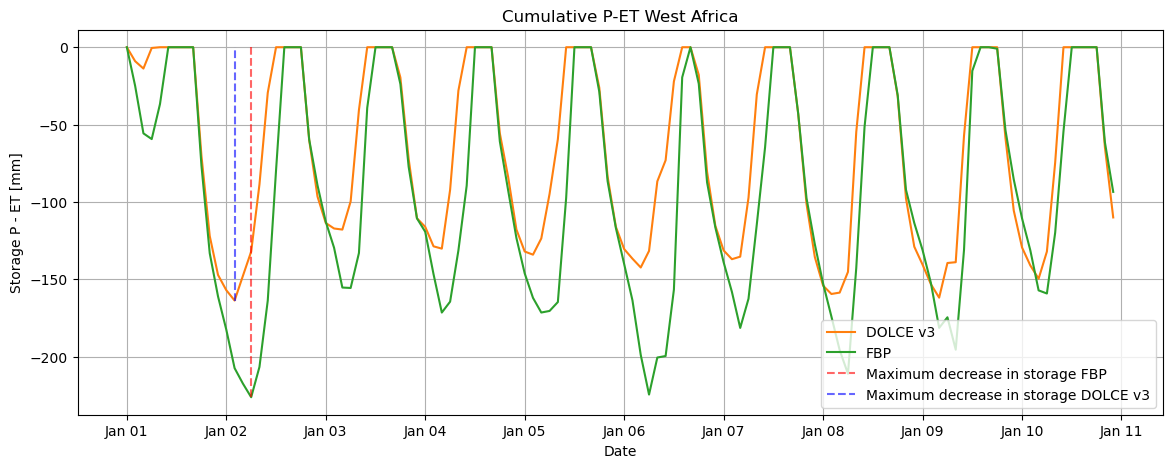

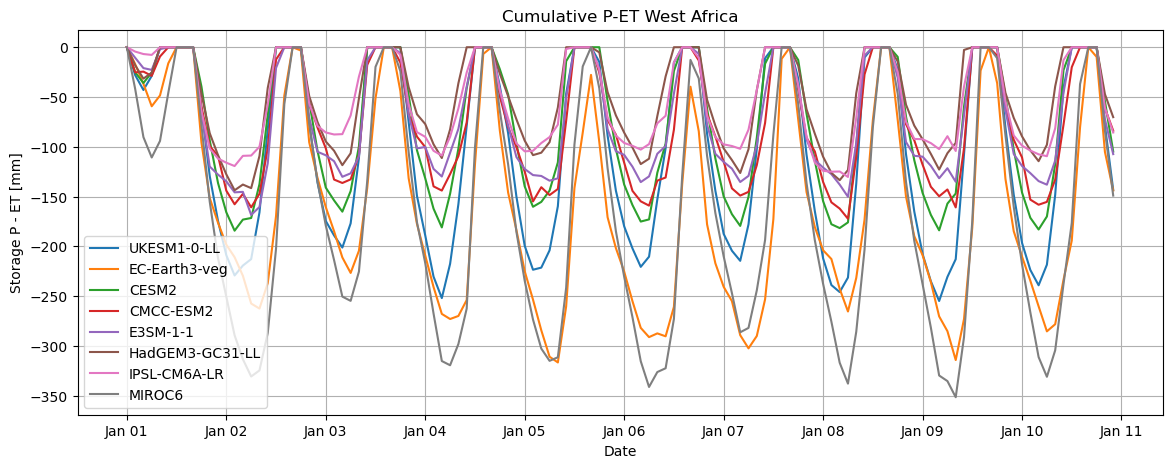

In [7]:
"""Benchmark products"""

plt.figure(figsize = (14 , 5))
plt.ylabel('Storage P - ET [mm]')
#plt.plot(S1_LFE , label = 'Storage according to LFE')
plt.plot(S1_DOLCE_v3 , label = 'DOLCE v3' , color= 'C1')
plt.plot(S1_FBP , label = 'FBP' , color = 'C2')
plt.plot([15 , 15] , [S1_FBP[15] , S1_FBP[0]] , color = 'red' , linestyle = 'dashed' , alpha = 0.6 , label = 'Maximum decrease in storage FBP')
plt.plot([13 , 13] , [S1_DOLCE_v3[13] , S1_DOLCE_v3[0]] , color = 'blue' , linestyle = 'dashed' , alpha = 0.6 , label = 'Maximum decrease in storage DOLCE v3')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.xlabel('Date')
plt.title('Cumulative P-ET West Africa')
plt.grid()
plt.legend();

S1 = [S1_DOLCE_v3 , S1_FBP, S1_UKESM1_0_LL , S1_EC_Earth3_veg , S1_CESM2 ,  S1_CMCC_ESM2 , S1_E3SM_1_1 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]

"""LS3MIP"""

plt.figure(figsize = (14 , 5))
plt.ylabel('Storage P - ET [mm]')
plt.plot(S1_UKESM1_0_LL , label = 'UKESM1-0-LL')
plt.plot(S1_EC_Earth3_veg , label = 'EC-Earth3-veg')
plt.plot(S1_CESM2 , label = 'CESM2')
plt.plot(S1_CMCC_ESM2 , label = 'CMCC-ESM2')
plt.plot(S1_E3SM_1_1 , label = 'E3SM-1-1')
plt.plot(S1_HadGEM3_GC31_LL , label = 'HadGEM3-GC31-LL')
plt.plot(S1_IPSL_CM6A_LR , label = 'IPSL-CM6A-LR')
plt.plot(S1_MIROC6 , label = 'MIROC6')
plt.xlabel('Date')
plt.title('Cumulative P-ET West Africa')
plt.xticks(np.arange(0 , 121 , 12) , ['Jan 01' , 'Jan 02' ,'Jan 03' ,'Jan 04' ,'Jan 05' ,'Jan 06' ,'Jan 07' ,'Jan 08' ,'Jan 09' ,'Jan 10' , 'Jan 11'])
plt.grid()
plt.legend();

In [8]:
print()
print(colored(f'The maximum decrease in storage between Autumn 2001 and Spring 2002' , 'blue'))

print('----' * 24)
print(f'The maximum decrease in storage in for  FBP             is equal to:           {S1_FBP[0] - S1_FBP[15]:.3f} mm')
print(f'The maximum decrease in storage in for  MIROC6          is equal to:           {S1_MIROC6[0] - S1_MIROC6[15]:.3f} mm')
print(f'The maximum decrease in storage in for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[0] - S1_UKESM1_0_LL[13]:.3f} mm')
print(f'The maximum decrease in storage in for  CESM2           is equal to:           {S1_CESM2[0] - S1_CESM2[13]:.3f} mm')
print(f'The maximum decrease in storage in for  HadGEM-GC31-LL  is equal to:           {S1_HadGEM3_GC31_LL[0] - S1_HadGEM3_GC31_LL[13]:.3f} mm')
print(f'The maximum decrease in storage in for  DOLCE v3        is equal to:           {S1_DOLCE_v3[0] - S1_DOLCE_v3[13]:.3f} mm')
print(f'The maximum decrease in storage in for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[0] - S1_EC_Earth3_veg[16]:.3f} mm')
print(f'The maximum decrease in storage in for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[0] - S1_CMCC_ESM2[15]:.3f} mm')
print(f'The maximum decrease in storage in for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[0] - S1_E3SM_1_1[15]:.3f} mm')
print(f'The maximum decrease in storage in for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[0] - S1_IPSL_CM6A_LR[13]:.3f} mm')

print('----' * 24)

print('According to the soil moisture content data the maximum decrease lies between 86.77 and 115.49 mm')
print()
print('86.77 mm is the decrease for the top 50 cm of the soil and 115.49 mm is the upper boundary of the extrapolated value')

print('----' * 24)


The maximum decrease in storage between Autumn 2001 and Spring 2002
------------------------------------------------------------------------------------------------
The maximum decrease in storage in for  FBP             is equal to:           226.220 mm
The maximum decrease in storage in for  MIROC6          is equal to:           330.727 mm
The maximum decrease in storage in for  UKESM1_0_LL     is equal to:           229.243 mm
The maximum decrease in storage in for  CESM2           is equal to:           184.270 mm
The maximum decrease in storage in for  HadGEM-GC31-LL  is equal to:           143.663 mm
The maximum decrease in storage in for  DOLCE v3        is equal to:           163.727 mm
The maximum decrease in storage in for  EC_Earth3_veg   is equal to:           262.484 mm
The maximum decrease in storage in for  CMCC-ESM2       is equal to:           160.810 mm
The maximum decrease in storage in for  E3SM-1-1        is equal to:           168.448 mm
The maximum decrease in 

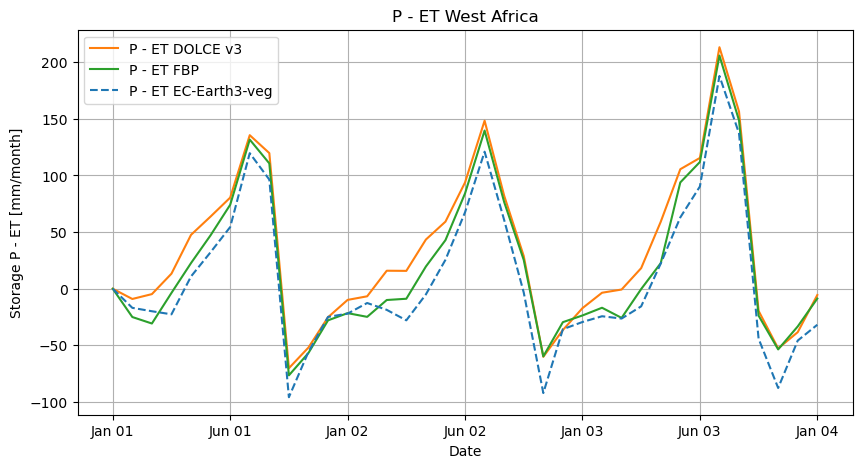

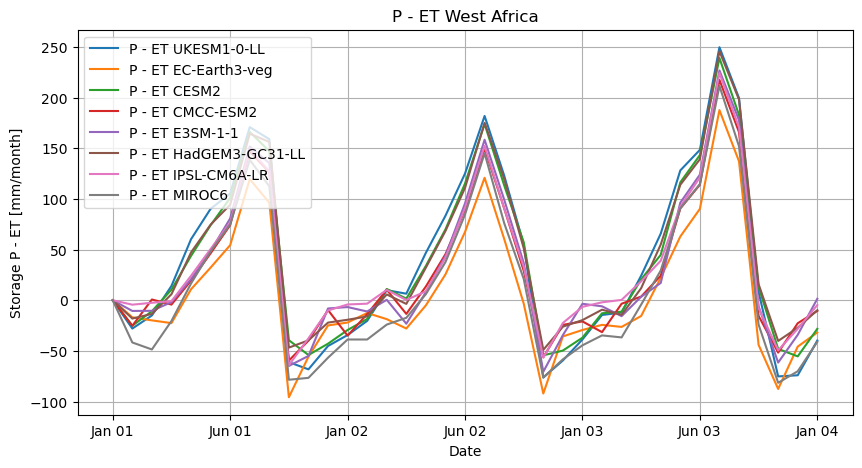

In [47]:
"""P - ET per month"""

t = 120

S_LFE = np.zeros(t)
S_DOLCE_v3 = np.zeros(t)
S_FBP = np.zeros(t)
S_UKEMS1_0_LL = np.zeros(t)
S_EC_Earth3_veg = np.zeros(t)
S_UKESM1_0_LL = np.zeros(t)
S_CESM2 = np.zeros(t)
S_CMCC_ESM2 = np.zeros(t)
S_E3SM_1_1 = np.zeros(t)
S_HadGEM3_GC31_LL = np.zeros(t)
S_IPSL_CM6A_LR = np.zeros(t)
S_MIROC6 = np.zeros(t)

for i in range(t):
    #S_LFE[i] = P_mean[i] - ET_mean_LFE[i]
    S_DOLCE_v3[i] = P_mean[i] - ET_mean_DOLCE_v3[i]
    S_FBP[i] = P_mean[i] - ET_mean_FBP[i]
    S_UKESM1_0_LL[i] = P_mean[i] - ET_mean_UKESM1_0_LL[i]
    S_EC_Earth3_veg[i] = P_mean[i] - ET_mean_EC_Earth3_veg[i]
    S_CESM2[i] = P_mean[i] - ET_mean_CESM2[i]
    S_CMCC_ESM2[i] = P_mean[i] - ET_mean_CMCC_ESM2[i]
    S_E3SM_1_1[i] = P_mean[i] - ET_mean_E3SM_1_1[i]
    S_HadGEM3_GC31_LL[i] = P_mean[i] - ET_mean_HadGEM3_GC31_LL[i]
    S_IPSL_CM6A_LR[i] =  P_mean[i] - ET_mean_IPSL_CM6A_LR[i]
    S_MIROC6[i] = P_mean[i] - ET_mean_MIROC6[i]
    S_LFE[0] = 0
    S_DOLCE_v3[0] = 0
    S_FBP[0] = 0 
    S_EC_Earth3_veg[0] = 0
    S_UKESM1_0_LL[0] = 0
    S_CESM2[0] = 0
    S_CMCC_ESM2[0] = 0
    S_E3SM_1_1[0] = 0 
    S_HadGEM3_GC31_LL[0] = 0
    S_IPSL_CM6A_LR[0] = 0
    S_MIROC6[0] = 0

"""Benchmark products"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/month]')
#plt.plot(S_LFE , label = 'Storage according to LFE')
plt.plot(S_DOLCE_v3[0:37] , label = 'P - ET DOLCE v3' , color= 'C1')
plt.plot(S_FBP[0:37] , label = 'P - ET FBP' , color = 'C2')
plt.plot(S_EC_Earth3_veg[0:37] , label = 'P - ET EC-Earth3-veg' , linestyle = 'dashed')
plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('P - ET West Africa')
plt.grid()
plt.legend();

"""LS3MIP"""

plt.figure(figsize = (10 , 5))
plt.ylabel('Storage P - ET [mm/month]')
plt.plot(S_UKESM1_0_LL[0:37] , label = 'P - ET UKESM1-0-LL')
plt.plot(S_EC_Earth3_veg[0:37] , label = 'P - ET EC-Earth3-veg')
plt.plot(S_CESM2[0:37] , label = 'P - ET CESM2')
plt.plot(S_CMCC_ESM2[0:37] , label = 'P - ET CMCC-ESM2')
plt.plot(S_E3SM_1_1[0:37] , label = 'P - ET E3SM-1-1')
plt.plot(S_HadGEM3_GC31_LL[0:37] , label = 'P - ET HadGEM3-GC31-LL')
plt.plot(S_IPSL_CM6A_LR[0:37] , label = 'P - ET IPSL-CM6A-LR')
plt.plot(S_MIROC6[0:37] , label = 'P - ET MIROC6')

plt.xticks([0 , 6 , 12 , 18 , 24 , 30 , 36] , ['Jan 01' , 'Jun 01' , 'Jan 02' ,  'Jun 02' , 'Jan 03' , 'Jun 03' , 'Jan 04'])
plt.xlabel('Date')
plt.title('P - ET West Africa')
plt.grid()
plt.legend();

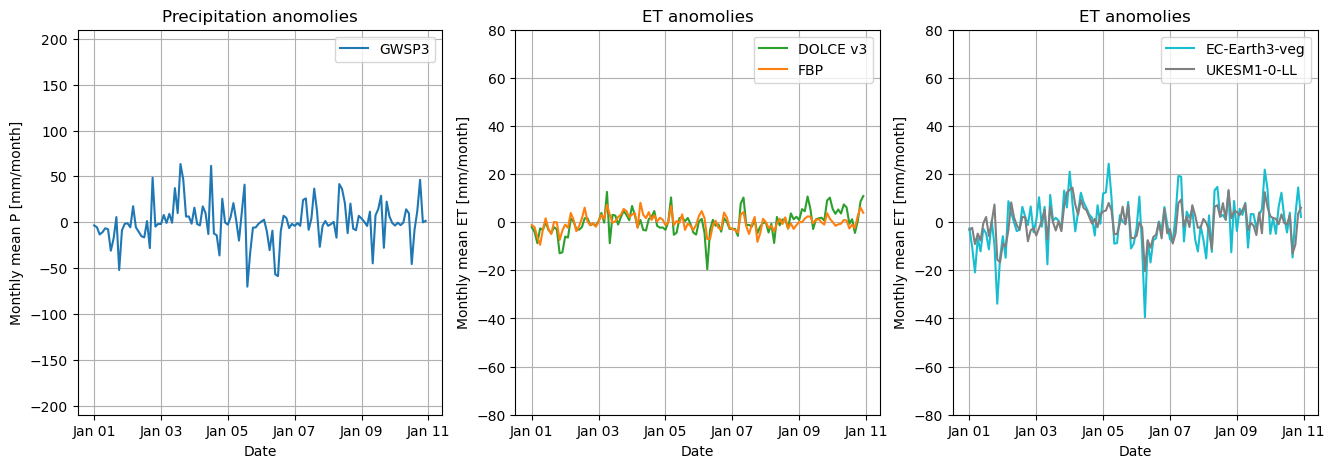

In [48]:
"""P - ET response anomolies"""


"""Precipitation"""

P_pm_mean = np.zeros(12)
P_an = np.zeros(120)
mpy = np.arange(0 , 120 , 12)

for i in range(12):
    #Array per month average
    P_pm_mean[i] = np.mean([P_mean[i] , P_mean[i + 12] , P_mean[i + 24] ,  P_mean[i+36] , 
    P_mean[i + 48] , P_mean[i + 60] , P_mean[i + 72] , P_mean[i + 84] , P_mean[i + 96] , 
    P_mean[i + 108]])
    
for j in range(len(mpy)):   
    for i in range(12):
        P_an[mpy[j] + i] = P_mean[mpy[j]+i] - P_pm_mean[i]


"""Evapotranspiration"""

ET_mean = [ET_mean_DOLCE_v3 , ET_mean_FBP, ET_mean_UKESM1_0_LL , ET_mean_EC_Earth3_veg , ET_mean_CESM2 ,  ET_mean_CMCC_ESM2 , ET_mean_E3SM_1_1 , ET_mean_HadGEM3_GC31_LL , ET_mean_IPSL_CM6A_LR , ET_mean_MIROC6]
ET_pm_mean = np.zeros((10 , 12))

for j in range(len(ET_mean)):
    for i in range(12):
        #Array per month average
        ET_pm_mean[j , i] = np.mean([ET_mean[j][i] , ET_mean[j][i + 12] , ET_mean[j][i + 24] ,  ET_mean[j][i+36] , 
        ET_mean[j][i + 48] , ET_mean[j][i + 60] , ET_mean[j][i + 72] , ET_mean[j][i + 84] , ET_mean[j][i + 96] , 
        ET_mean[j][i + 108]])

ET_an = np.zeros((10 , 120))
mpy = np.arange(0 , 120 , 12)

for m in range(len(ET_mean)):
    for j in range(len(mpy)):   
        for i in range(12):
            ET_an[m][mpy[j] + i] = ET_mean[m][mpy[j]+i] - ET_pm_mean[m][i]

            

plt.figure(figsize = (16 , 5))

plt.subplot(131)
plt.title('Precipitation anomolies')
plt.xlabel('Date')
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.ylabel('Monthly mean P [mm/month]')
plt.grid()
plt.ylim(-210 , 210)
plt.plot(P_an , label = 'GWSP3')
plt.legend()

plt.subplot(132)
plt.title('ET anomolies')
plt.xlabel('Date')
plt.ylabel('Monthly mean ET [mm/month]')
plt.ylim(-80 , 80)
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.grid()
plt.plot(ET_an[0] , label = 'DOLCE v3'  , color = 'C2')
plt.plot(ET_an[1] , label = 'FBP'  , color = 'C1')
plt.legend();

plt.subplot(133)
plt.title('ET anomolies')
plt.xlabel('Date')
plt.xticks(np.arange(0 , 121 , 24) , ['Jan 01' , 'Jan 03' ,'Jan 05' ,'Jan 07' ,'Jan 09' , 'Jan 11'])
plt.ylabel('Monthly mean ET [mm/month]')
plt.ylim(-80 , 80)
plt.grid()
plt.plot(ET_an[3] , label = 'EC-Earth3-veg'  , color = 'C9')
plt.plot(ET_an[2] , label = 'UKESM1-0-LL'  , color = 'C7')
plt.legend();

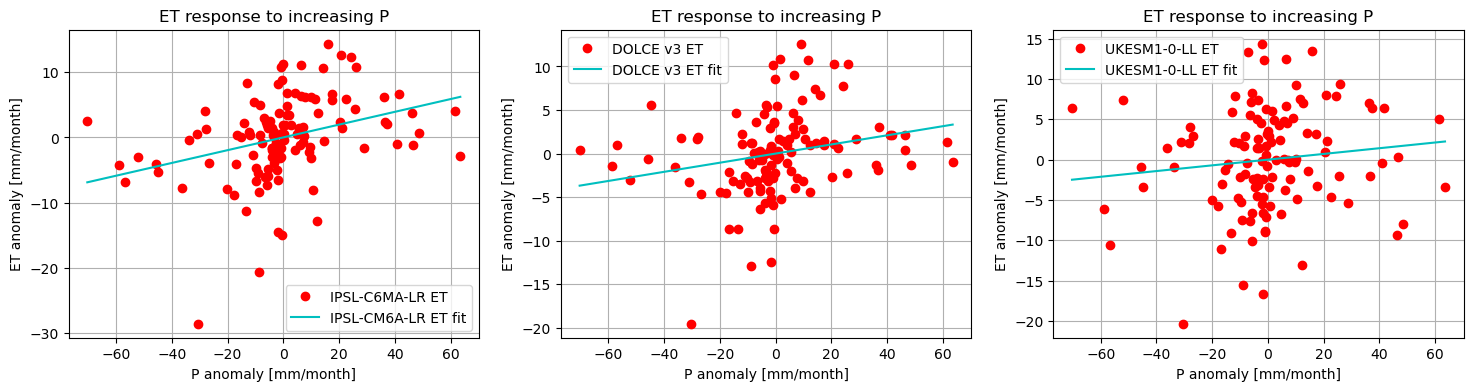

In [49]:
"""P - ET anomaly response"""

d = {'P_mean': P_an, 'UKESM1-0-LL_ET' : ET_an[2] , 'EC-Earth3-veg_ET' : ET_an[3] , 'CESM2_ET' : ET_an[4] , 'CMCC-ESM2_ET':ET_an[5] 
     ,'E3SM-1-1_ET':ET_an[6] , 'HadGEM3-GC31-LL_ET' : ET_an[7] , 'IPSL-CM6A-LR_ET':ET_an[8] , 'MIROC6_ET':ET_an[9] , 'DOLCE_v3_ET' : ET_an[0]
     , 'FBP_ET':ET_an[1]}
df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])


plt.figure(figsize = (18 , 4))
plt.subplot(131)
plt.plot(df['P_mean'] , df['IPSL-CM6A-LR_ET'] , 'ro' , label = 'IPSL-C6MA-LR ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['IPSL-CM6A-LR_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'IPSL-CM6A-LR ET fit')
plt.legend();

plt.subplot(132)
plt.plot(df['P_mean'] , df['DOLCE_v3_ET'] , 'ro' , label = 'DOLCE v3 ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['DOLCE_v3_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'DOLCE v3 ET fit')
plt.legend();

plt.subplot(133)
plt.plot(df['P_mean'] , df['UKESM1-0-LL_ET'] , 'ro' , label = 'UKESM1-0-LL ET');
#df = df[df.P_mean.notnull()]

def func(x, a, b):
    return a *  x + b

xdata = df['P_mean']
ydata = df['UKESM1-0-LL_ET']


popt , pcov  = curve_fit(func , xdata, ydata)
plt.ylabel('ET anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.title('ET response to increasing P')
plt.grid()
plt.plot(xdata , func(xdata, *popt) , 'c' , label = 'UKESM1-0-LL ET fit')
plt.legend();

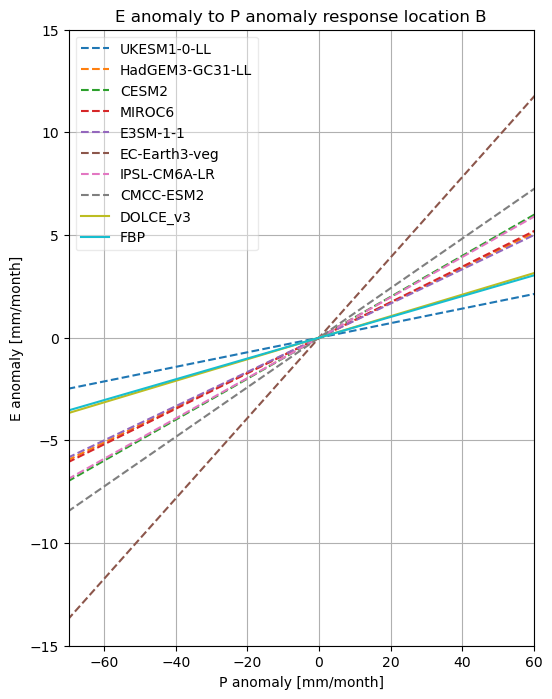

In [72]:
"""Exponential function"""

def func(x, a , b):
    return a * x + b

label = ['UKESM1-0-LL'  , 'HadGEM3-GC31-LL' ,  'CESM2' , 'MIROC6' , 'E3SM-1-1' , 'EC-Earth3-veg'  , 'IPSL-CM6A-LR' , 'CMCC-ESM2' , 'DOLCE_v3' , 'FBP']
y = df['UKESM1-0-LL_ET'] , df['HadGEM3-GC31-LL_ET'] , df['CESM2_ET'] , df['MIROC6_ET'] , df['E3SM-1-1_ET'] , df['EC-Earth3-veg_ET'], df['IPSL-CM6A-LR_ET'] , df['CMCC-ESM2_ET'] , df['DOLCE_v3_ET'] , df['FBP_ET']
linestyle = ['dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'dashed' , 'solid' , 'solid']
S = np.zeros(len(label))
a = np.zeros(len(label))

plt.figure(figsize = (6 , 8))

for i in range(len(label)):
    xdata = df['P_mean']
    ydata = y[i]
    popt , pcov  = curve_fit(func , xdata, ydata)
    plt.plot(xdata , func(xdata, *popt) , label = label[i] , linestyle = linestyle[i]);
    S[i] = func(xdata[0] , *popt)
    a[i] = popt[0]


plt.title('E anomaly to P anomaly response location B')
plt.ylim(-15 , 15)
plt.grid()
plt.xlim(-70 , 60)
plt.ylabel('E anomaly [mm/month]')
plt.xlabel('P anomaly [mm/month]')
plt.legend(framealpha = 0.4);

------------------------------------------------
Climate Model
------------------------------------------------
The mean monthly E is: 56.734 from UKESM1-0-LL
The mean monthly E is: 86.989 from EC-Earth3-veg
The mean monthly E is: 56.978 from CESM2
The mean monthly E is: 67.858 from CMCC-ESM2
The mean monthly E is: 63.411 from E3SM-1-1
The mean monthly E is: 52.015 from HadGEM3-GC31-LL
The mean monthly E is: 61.455 from IPSL-CM6A-LR
The mean monthly E is: 82.994 from MIROC6
------------------------------------------------
Benchmark product
------------------------------------------------
The mean monthly E is: 61.733 from DOLCE v3
The mean monthly E is: 71.827 from FBP



array([ 18.86786578,  13.47371537,  20.02648044,  42.98215592,
        68.70464069,  84.94127154,  92.20811162,  92.56385038,
       101.05043006, 102.71841719,  65.27272654,  37.98183998])

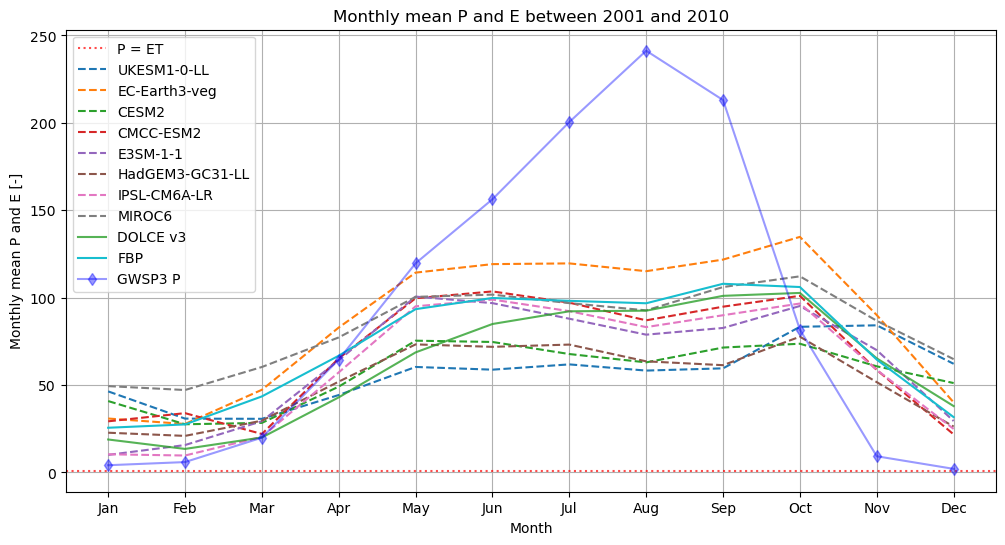

In [51]:
"""Comparing yearly GSWP3 P and LS3MIP E for every model"""

label = ['DOLCE_v3' , 'FBP' , 'UKESM1-0-LL' , 'EC-Earth3-veg' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']

plt.figure(figsize= (12 ,6))
plt.axhline(y = 1 , xmin = 0 , xmax = 1 , color = 'red' , linestyle = 'dotted' , alpha = 0.7 , label = 'P = ET')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Monthly mean P and E [-]')
plt.title('Monthly mean P and E between 2001 and 2010')

for i in range(2 , 10):
    plt.plot(ET_pm_mean[i] , label = label[i] , linestyle = 'dashed')

plt.plot(ET_pm_mean[0] , label = 'DOLCE v3' , color = 'C2' , alpha = 0.8)
plt.plot(ET_pm_mean[1] , label = 'FBP' , color = 'C9')
plt.plot(P_pm_mean , 'bd-' , label = 'GWSP3 P', alpha = 0.4)
plt.xticks(np.arange(0 , 12 , 1) , ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec'])

plt.legend();

"""Average state of E"""

print('----' * 12)
print('Climate Model')
print('----' * 12)

for i in range(2 , 10):
    print(f'The mean monthly E is: {ET_pm_mean[i].mean():.3f} from {label[i]}')

print('----' * 12)
print('Benchmark product')
print('----' * 12)
print(f'The mean monthly E is: {ET_pm_mean[0].mean():.3f} from DOLCE v3')
print(f'The mean monthly E is: {ET_pm_mean[1].mean():.3f} from FBP')
print()

ET_pm_mean[0]

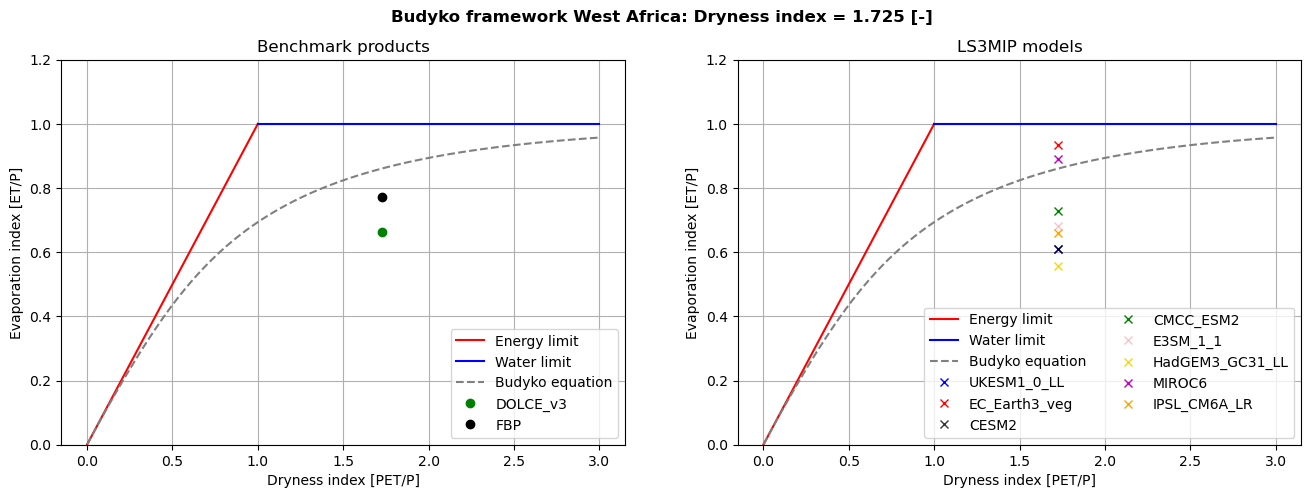

In [52]:
"""!!!"""


"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/GSWP3/Daily'


Tas = xr.open_dataset(home + '/tas_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_min = xr.open_dataset(home + '/tasmin_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')
Tas_max = xr.open_dataset(home + '/tasmax_gswp3-ewembi_2001_2010_lat8.0to12.0lon0.0to4.0.nc4' , engine = 'netcdf4')

Tav = Tas.tas[: ,  : , :]
Tmax = Tas_max.tasmax[: , : , :]
Tmin = Tas_min.tasmin[: , : , :]

"""EP_0"""

def EP_HS(J, lat ,Tmax,Tmin,Tav):
    # extraterrestrial radation
    G = 0.0820  #MJ m^-2 min^-1
    phi = lat/360 * (2*np.pi) #rad
    d = 1 + 0.033 * np.cos(0.0172 * J) #[-]
    delta = 0.409 * np.sin(0.0172 * J - 1.39) #rad
    w = np.arccos(-np.tan(phi)*np.tan(delta)) #rad
    Re = (24*60)/np.pi * G * d * (w*np.sin(phi)*np.sin(delta) + np.cos(phi)*np.cos(delta)*np.sin(w)) #MJ m^-2 d^-1
    
    # Hargreaves and Samani EP
    labda = 2.45 # MJ kg^-1
    alpha = 0.0023
    Ep = (1/labda) * alpha * Re * (Tav + 17.8) * np.sqrt(Tmax-Tmin) #convert to mm
    if(Ep<0):
        Ep=0
    return(Ep)

EP_0 = np.zeros(365)

for i in range(365):
    EP_0[i] = EP_HS(i+1 , -14 , Tmax[i , : , :].mean()-273.15 , Tmin[i , : , :].mean()-273.15 , Tav[i , : , :].mean()-273.15) * (365.2 / 12)

"""Budyko framework"""

x = [0 , 1]
y = [0 , 1]
y2 = [1 , 1]
x2 = [1 , 3]

plt.figure(figsize = (16 , 5))
plt.subplot(121)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')


"""Budyko equation"""

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

"""Models"""

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_DOLCE_v3.mean()/ P_mean.mean() , 'go' , label = 'DOLCE_v3')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_FBP.mean()/ P_mean.mean() , 'ko' , label = 'FBP')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('Benchmark products')
plt.grid()
plt.legend()
plt.ylim(0 , 1.2)

plt.subplot(122)
plt.plot(x , y , 'r' , label = 'Energy limit')
plt.plot(x2 , y2 , 'blue' , label = 'Water limit')

xb = np.linspace(0.001 , 3 , 100)
yb = np.sqrt(xb * (1 - np.exp(-xb))*np.tanh(xb**-1))
plt.plot(xb , yb , label = 'Budyko equation' , linestyle = 'dashed' , color = 'grey')

plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_UKESM1_0_LL.mean()/ P_mean.mean() , 'bx' , label = 'UKESM1_0_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_EC_Earth3_veg.mean()/ P_mean.mean() , 'rx' , label = 'EC_Earth3_veg')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CESM2.mean()/ P_mean.mean() , 'kx' , label = 'CESM2' , alpha = 0.8)
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_CMCC_ESM2.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , marker = 'x' , color = 'green',  label = 'CMCC_ESM2')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_E3SM_1_1.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'pink' , marker = 'x' , label = 'E3SM_1_1')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_HadGEM3_GC31_LL.mean()/ P_mean.mean() , linestyle = (0 , (0 , 100)) , color = 'gold' , marker = 'x' , label = 'HadGEM3_GC31_LL')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_MIROC6.mean()/ P_mean.mean() , 'mx' , label = 'MIROC6')
plt.plot(EP_0.mean()/P_mean.mean() , ET_mean_IPSL_CM6A_LR.mean()/ P_mean.mean() ,linestyle = (0 , (0 , 100)), color = 'orange' , marker = 'x' , label = 'IPSL_CM6A_LR')

plt.xlabel('Dryness index [PET/P]')
plt.ylabel('Evaporation index [ET/P]')
plt.title('LS3MIP models')
plt.suptitle(f'Budyko framework West Africa: Dryness index = {EP_0.mean()/P_mean.mean():.3f} [-]' , fontweight = 'bold')
plt.grid()
plt.ylim(0 , 1.2)
plt.legend(ncols = 2);

In [53]:
"""SOMO.ML"""

"""West Africa"""

home = '/scratch/pdenblaauwen/rootzone/Benchmark_soilmoisture_products'

"""Monthly data"""

layer_01_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer1_2001_2012/SoMo.ml_v1_layer1_2001-2012_monthly_WA.nc' , engine = 'netcdf4')
layer_02_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer2_2001_2012/SoMo.ml_v1_layer2_2001-2012_monthly_WA.nc' , engine = 'netcdf4')
layer_03_2001_2012_monthly = xr.open_dataset(home + '/SoMo.ml_v1_layer3_2001_2012/SoMo.ml_v1_layer3_2001-2012_monthly_WA.nc' , engine = 'netcdf4')

In [54]:
L1 = np.zeros(120)
L2 = np.zeros(120)
L3 = np.zeros(120)

for i in range(120):
    L1[i] = layer_01_2001_2012_monthly.layer1[i , : , :].mean()
    L2[i] = layer_02_2001_2012_monthly.layer2[i , : , :].mean()
    L3[i] = layer_03_2001_2012_monthly.layer3[i , : , :].mean()

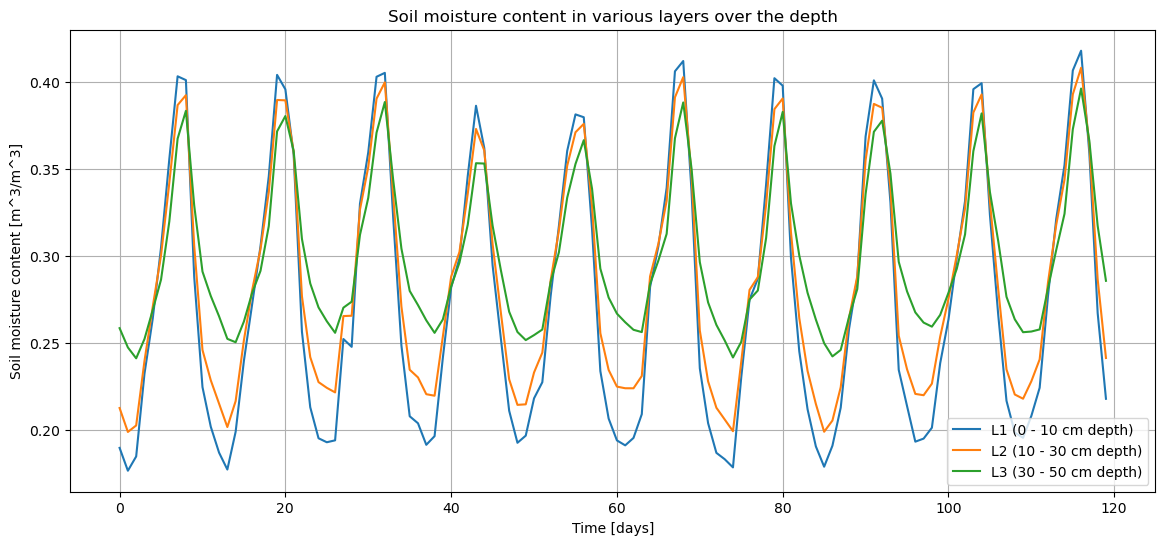

In [55]:
plt.figure(figsize = (14 , 6))

plt.plot(L1 , label = 'L1 (0 - 10 cm depth)')
plt.plot(L2 , label = 'L2 (10 - 30 cm depth)')
plt.plot(L3 , label = 'L3 (30 - 50 cm depth)')

plt.title('Soil moisture content in various layers over the depth')
plt.legend()
plt.xlabel('Time [days]')
plt.ylabel('Soil moisture content [m^3/m^3]')
plt.grid();

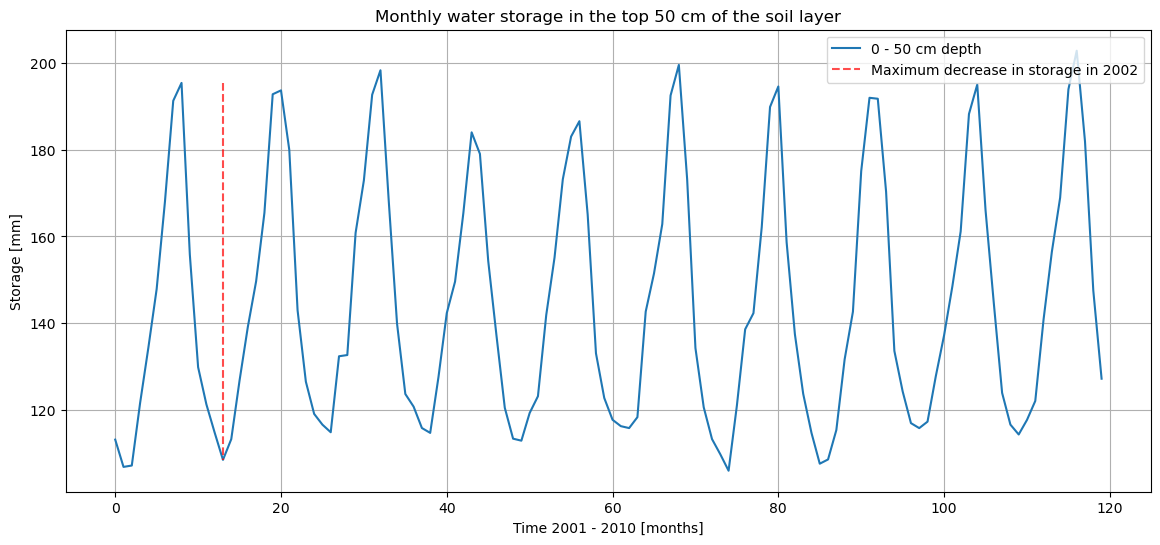

In [56]:
Storage = L1 * 0.1 + L2 * 0.2 + L3 * 0.2
Storage = Storage * 1000 #convert to mm

plt.figure(figsize = (14 , 6))
plt.plot(Storage , label = '0 - 50 cm depth')
plt.ylabel('Storage [mm]')
plt.xlabel('Time 2001 - 2010 [months]')
plt.title('Monthly water storage in the top 50 cm of the soil layer')
plt.grid()

plt.plot([13 , 13] , [Storage[8] , Storage[13]] , 'r--' , alpha = 0.7 , label = 'Maximum decrease in storage in 2002')
plt.legend();

In [57]:
print('-----' * 19)
print(f'The maximum decrease in storage in 2002 for                  is equal to:           {Storage[8] - Storage[13]:.3f} mm')
print(f'The decrease in layer 1 (0 - 10 cm)                          is equal to:           {(L1[8] - L1[13])*100:.3f} mm')
print(f'The decrease in layer 1 (10 - 30 cm)                         is equal to:           {(L2[8] - L2[13])*200:.3f} mm')
print(f'The decrease in layer 1 (30 - 50 cm)                         is equal to:           {(L3[8] - L3[13])*200:.3f} mm')
print('-----' * 19)

-----------------------------------------------------------------------------------------------
The maximum decrease in storage in 2002 for                  is equal to:           86.770 mm
The decrease in layer 1 (0 - 10 cm)                          is equal to:           22.390 mm
The decrease in layer 1 (10 - 30 cm)                         is equal to:           38.159 mm
The decrease in layer 1 (30 - 50 cm)                         is equal to:           26.221 mm
-----------------------------------------------------------------------------------------------


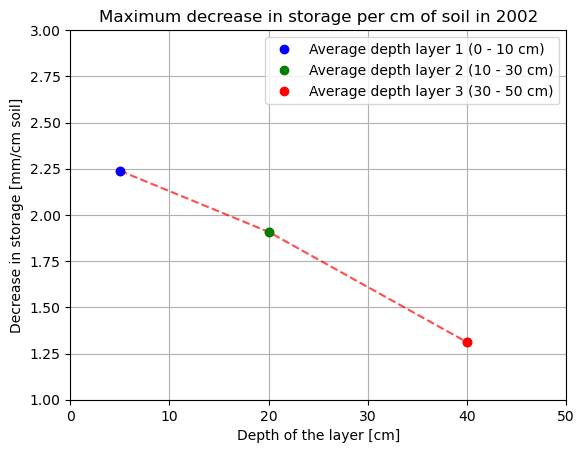

In [58]:
"""Relative decrease per cm"""

plt.plot([5 , 20 , 40] , [(L1[8] - L1[13])*10 , (L2[8] - L2[13])*10 , (L3[8] - L3[13])*10] , 'ro--' , alpha = 0.7)

plt.plot(5 , (L1[8] - L1[13]) * 10 , 'bo' , label = 'Average depth layer 1 (0 - 10 cm)')
plt.plot(20 , (L2[8] - L2[13]) * 10 , 'go' , label = 'Average depth layer 2 (10 - 30 cm)')
plt.plot(40 , (L3[8] - L3[13]) * 10 , 'ro' , label = 'Average depth layer 3 (30 - 50 cm)')

plt.ylabel('Decrease in storage [mm/cm soil]')
plt.xlabel('Depth of the layer [cm]')
plt.title('Maximum decrease in storage per cm of soil in 2002')
plt.xlim(0 , 50)
plt.ylim(1 , 3)
plt.grid()
plt.legend();


The minimum decrease in storage in the whole soil layer for the year 2002 is equal to 86.770 mm
The maximum decrease in storage in the whole soil layer for the year 2002 is equal to 115.489 mm

The average depth of the layer goes until 83.81 cm



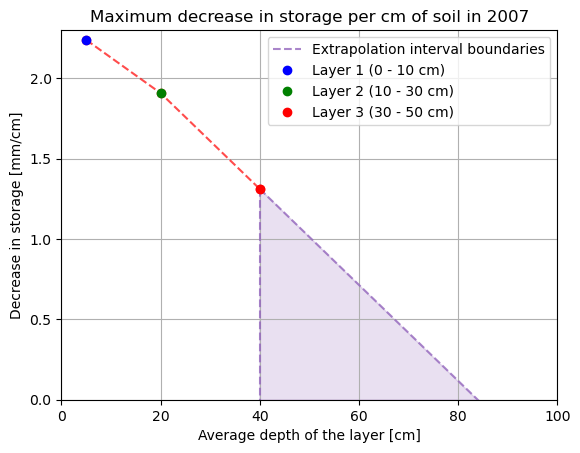

In [59]:
"""Decrease per cm per soil layer"""

plt.plot([5 , 20 , 40] , [(L1[8] - L1[13])*10 , (L2[8] - L2[13])*10 , (L3[8] - L3[13])*10] , 'ro--' , alpha = 0.7)

x = np.linspace(0 , 60 , 100)
y = -((L2[8] - L2[13])*10 - (L3[8] - L3[13])*10)/20 * x + (L3[8] - L3[13])*10

plt.plot(x + 40 , y , linestyle = 'dashed' , color = 'C4' , label = 'Extrapolation interval boundaries' , alpha = 0.8)
plt.plot([40 , 40] , [(L3[8] - L3[13])*10 , 0] , color = 'C4' , linestyle = 'dashed' , alpha = 0.8)

plt.plot(5 , (L1[8] - L1[13]) * 10 , 'bo' , label = 'Layer 1 (0 - 10 cm)')
plt.plot(20 , (L2[8] - L2[13]) * 10 , 'go' , label = 'Layer 2 (10 - 30 cm)')
plt.plot(40 , (L3[8] - L3[13]) * 10 , 'ro' , label = 'Layer 3 (30 - 50 cm)')

plt.ylabel('Decrease in storage [mm/cm]')
plt.xlabel('Average depth of the layer [cm]')
plt.title('Maximum decrease in storage per cm of soil in 2007')
plt.xlim(0 , 100)
plt.ylim(0 , 2.3)
plt.grid()

trianglex = [40 , 83.81 , 40 , 40]
triangley = [(L3[8] - L3[13]) * 10 , 0 , 0 , (L3[8] - L3[13]) * 10]

plt.fill(trianglex, triangley , color = 'C4' , alpha = 0.2)

plt.legend();

print()
print(f'The minimum decrease in storage in the whole soil layer for the year 2002 is equal to {Storage[8] - Storage[13]:.3f} mm')
print(f'The maximum decrease in storage in the whole soil layer for the year 2002 is equal to {Storage[8] - Storage[13] + (L3[8] - L3[13]) * 10 / 2 * 43.81:.3f} mm')
print()
print('The average depth of the layer goes until 83.81 cm')
print()

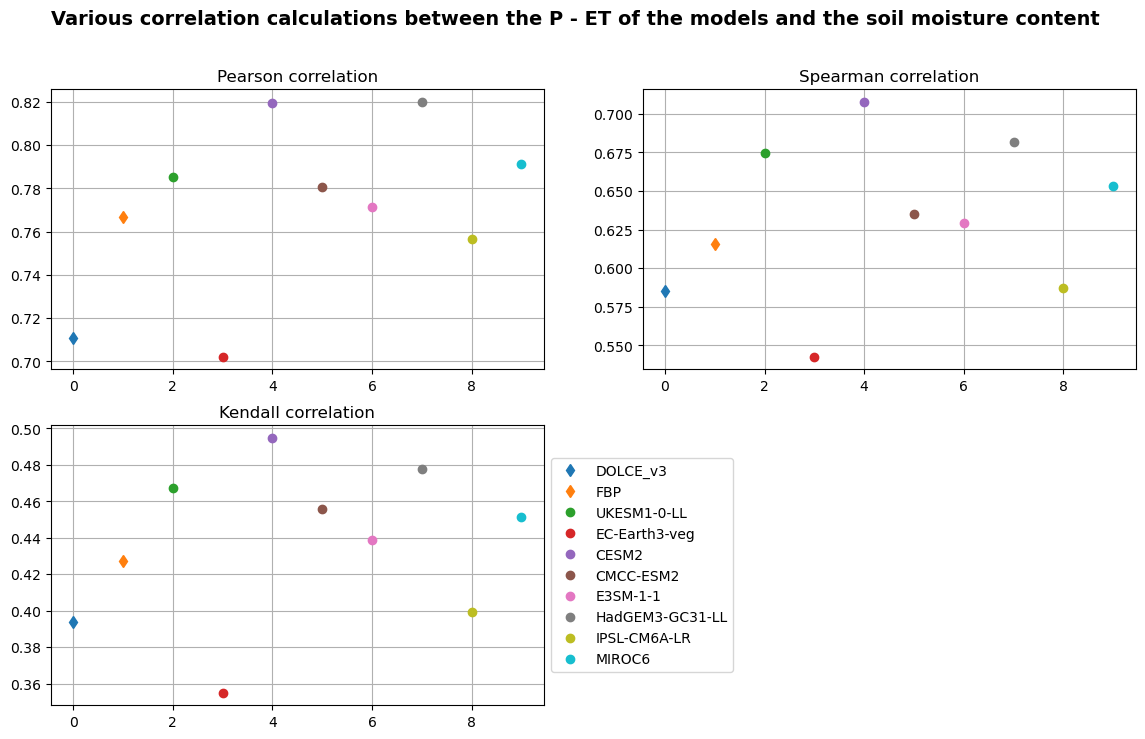

In [60]:


plt.figure(figsize = (14 , 8))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]

label = ['DOLCE_v3' , 'FBP' ,'UKESM1-0-LL' , 'EC-Earth3-veg' , 'CESM2' , 'CMCC-ESM2' , 'E3SM-1-1' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
marker = ['d' , 'd' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o' , 'o']

for i in range(len(S)):
    x = S[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    plt.subplot(222)
    plt.plot(i , spearmanr[0] , marker = marker[i] , label = label[i])
    plt.subplot(223)
    plt.plot(i , kendalltau[0] , marker = marker[i] , linestyle = (0 , (0 , 100)),  label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Spearman correlation')
plt.grid()
plt.subplot(223)
plt.title('Kendall correlation')
plt.grid()

plt.suptitle('Various correlation calculations between the P - ET of the models and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

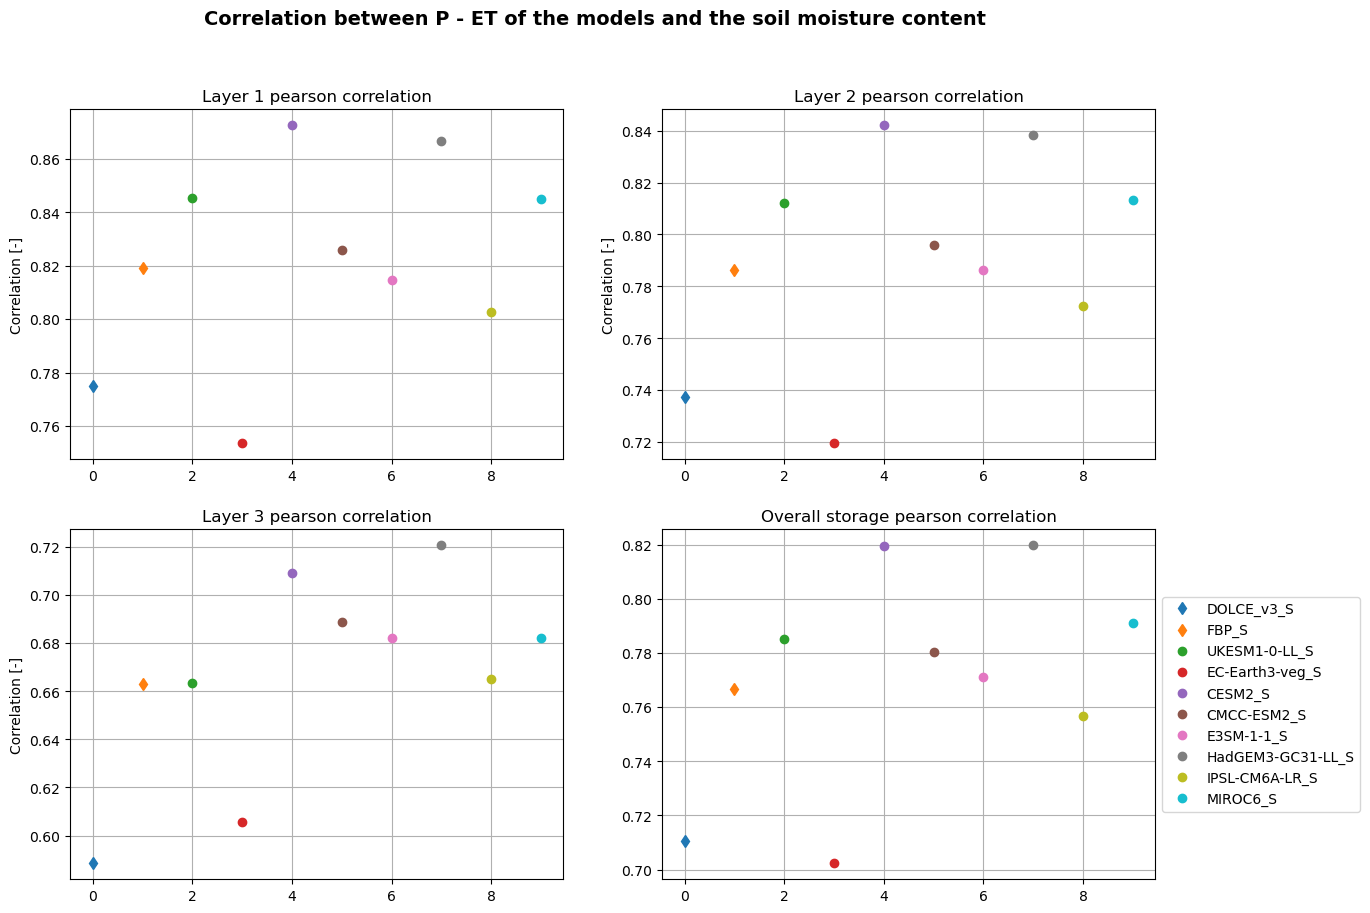

In [61]:
plt.figure(figsize = (14 , 10))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S)):
    x = S[i]
    y = L1
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S[i]
    y = L2
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S[i]
    y = L3
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

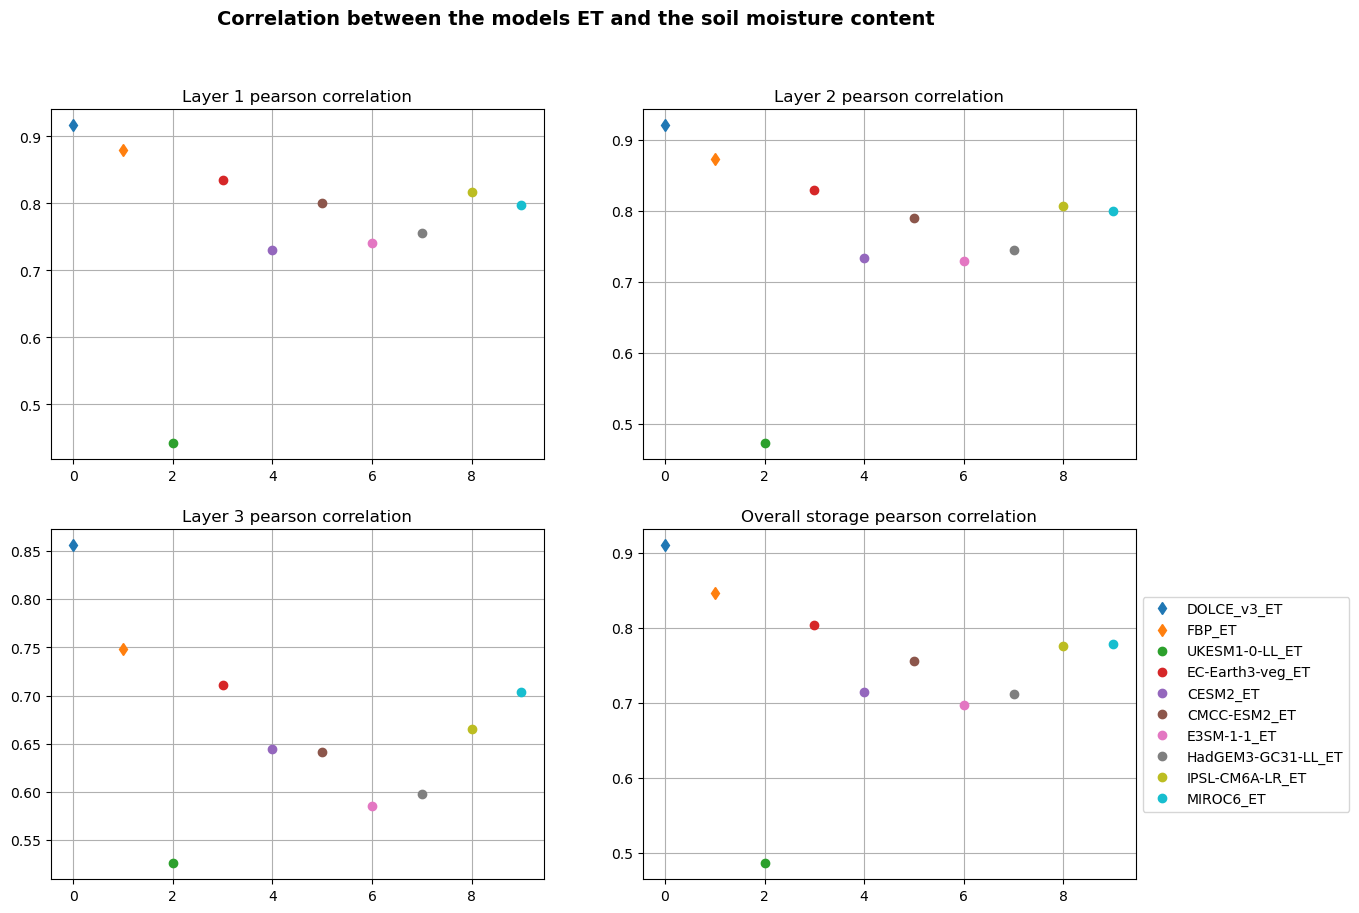

In [62]:
plt.figure(figsize = (14 , 10))
S = [S_DOLCE_v3 , S_FBP , S_UKESM1_0_LL  , S_EC_Earth3_veg , S_CESM2, S_CMCC_ESM2 , S_E3SM_1_1 , S_HadGEM3_GC31_LL , S_IPSL_CM6A_LR , S_MIROC6]
ET = [ET_mean_DOLCE_v3, ET_mean_FBP, ET_mean_UKESM1_0_LL, ET_mean_EC_Earth3_veg, ET_mean_CESM2, ET_mean_CMCC_ESM2, ET_mean_E3SM_1_1, ET_mean_HadGEM3_GC31_LL, ET_mean_IPSL_CM6A_LR,
ET_mean_MIROC6]

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

for i in range(len(S)):
    x = ET[i]
    y = L1
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = ET[i]
    y = L2
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = ET[i]
    y = L3
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = ET[i]
    y = Storage
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between the models ET and the soil moisture content' , fontsize = 14 ,fontweight = 'bold');

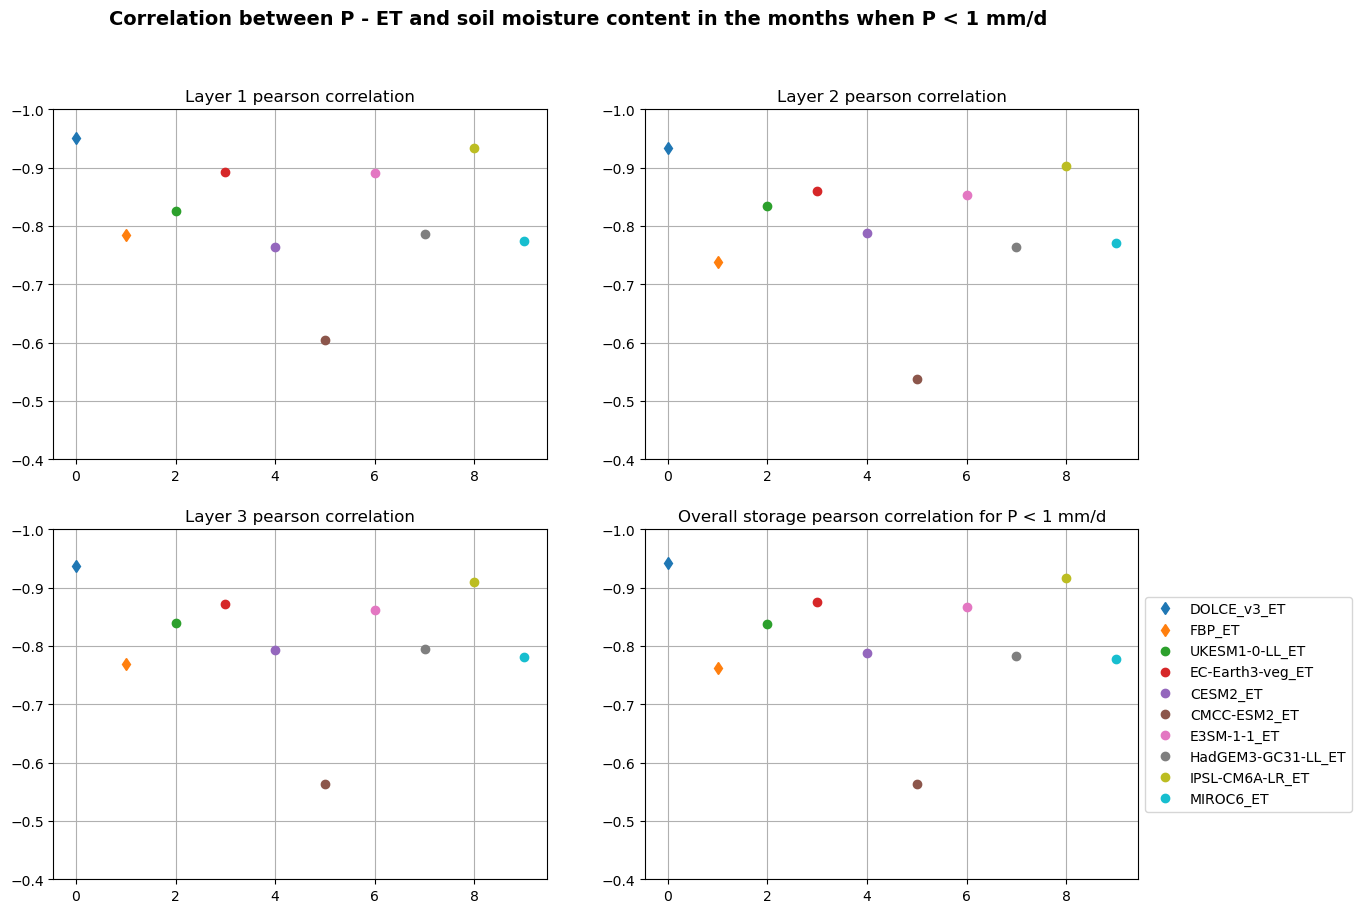

In [25]:
"""Focussing only on the months when P is low (P < 1 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' : S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] > 1].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(224)
plt.title('Overall storage pearson correlation for P < 1 mm/d')
plt.grid()
plt.ylim(-0.4 , -1)

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P < 1 mm/d' , fontsize = 14 ,fontweight = 'bold');

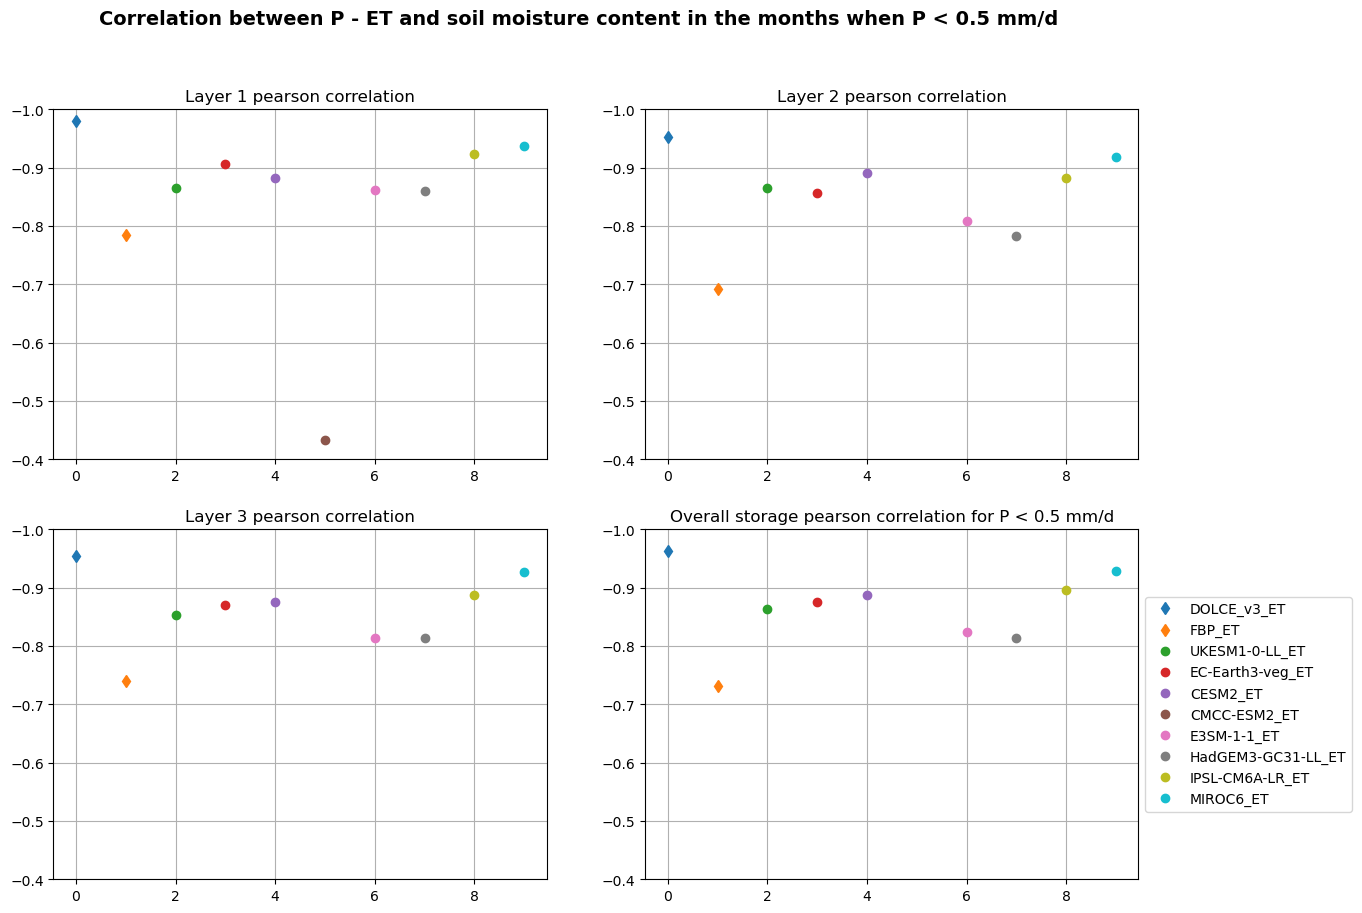

In [26]:
"""Focussing only on the months when P is low (P < 0.5 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' :S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] > 0.5].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.ylim(-0.4 , -1)
plt.subplot(224)
plt.title('Overall storage pearson correlation for P < 0.5 mm/d')
plt.grid()
plt.ylim(-0.4 , -1)

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P < 0.5 mm/d' , fontsize = 14 ,fontweight = 'bold');

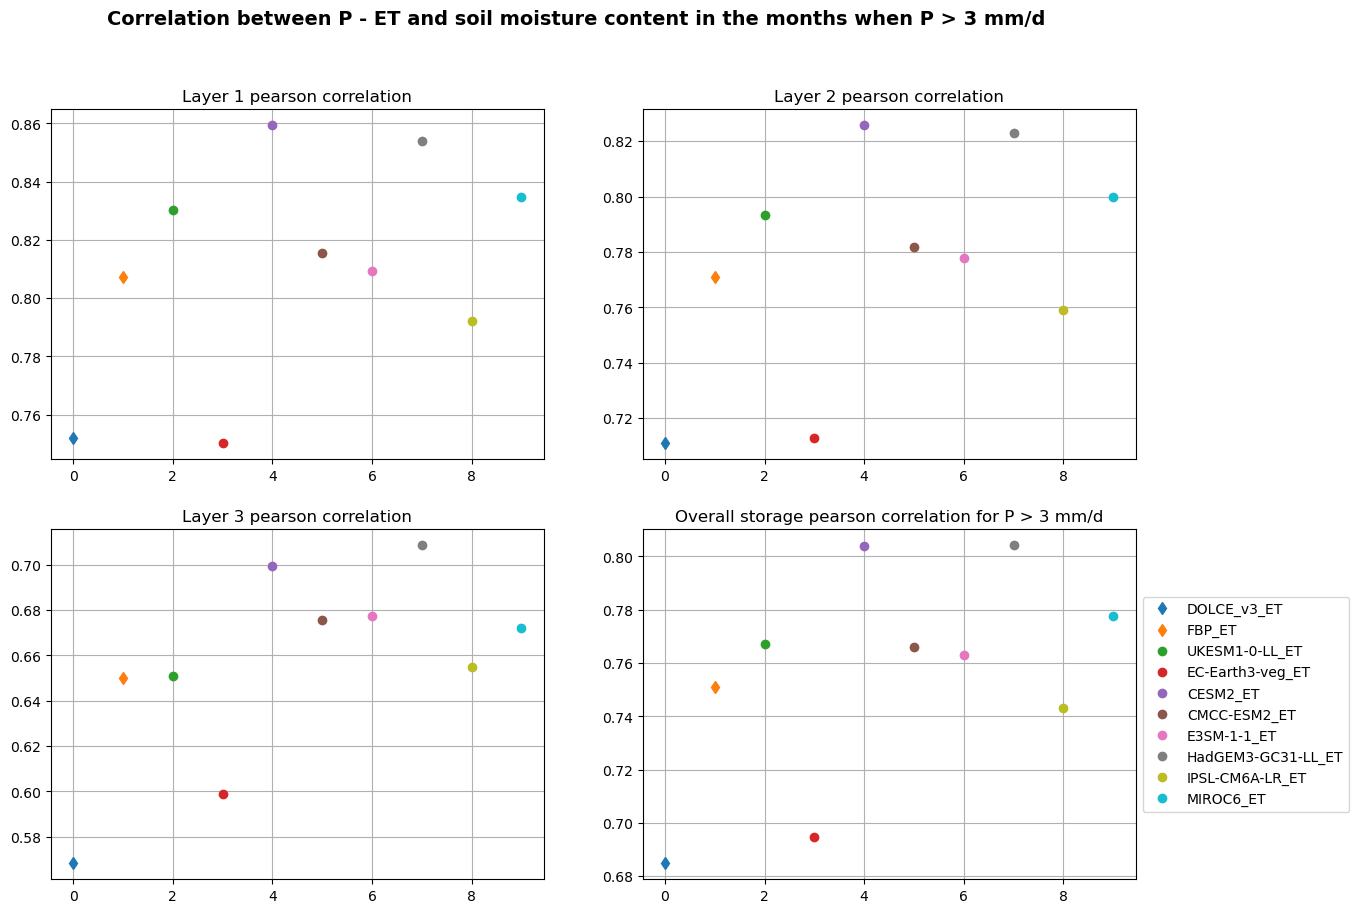

In [27]:
"""Focussing only on the months when average P is high (P > 3 mm/d)"""


d = {'P_mean': P_mean, 'L1':L1 , 'L2':L2 , 'L3':L3 , 'Storage':Storage , 'UKESM1-0-LL_ET' : S_UKESM1_0_LL , 'EC-Earth3-veg_ET' : S_EC_Earth3_veg , 'CESM2_ET' : S_CESM2 , 'CMCC-ESM2_ET':S_CMCC_ESM2 
     ,'E3SM-1-1_ET':S_E3SM_1_1 , 'HadGEM3-GC31-LL_ET' : S_HadGEM3_GC31_LL , 'IPSL-CM6A-LR_ET':S_IPSL_CM6A_LR , 'MIROC6_ET': S_MIROC6 
     , 'DOLCE_v3_ET' : S_DOLCE_v3, 'FBP_ET':S_FBP}

df = pd.DataFrame(d)
df = df.sort_values(by = ['P_mean'])
df.drop(df[df['P_mean'] < 3].index, inplace = True)

label = ['DOLCE_v3_ET' , 'FBP_ET' ,'UKESM1-0-LL_ET' , 'EC-Earth3-veg_ET' , 'CESM2_ET' , 'CMCC-ESM2_ET' , 'E3SM-1-1_ET' , 'HadGEM3-GC31-LL_ET' , 'IPSL-CM6A-LR_ET' , 'MIROC6_ET']

plt.figure(figsize = (14 , 10))

for i in range(len(label)):
    x = df[label[i]]
    y = df['L1']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(221)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L2']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(222)
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = df[label[i]]
    y = df['L3']
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.subplot(223)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    x = df[label[i]]
    y = df['Storage']
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation for P > 3 mm/d')
plt.grid()

plt.suptitle('Correlation between P - ET and soil moisture content in the months when P > 3 mm/d' , fontsize = 14 ,fontweight = 'bold');

In [28]:
"""For the year 2001/2002"""

'For the year 2001/2002'

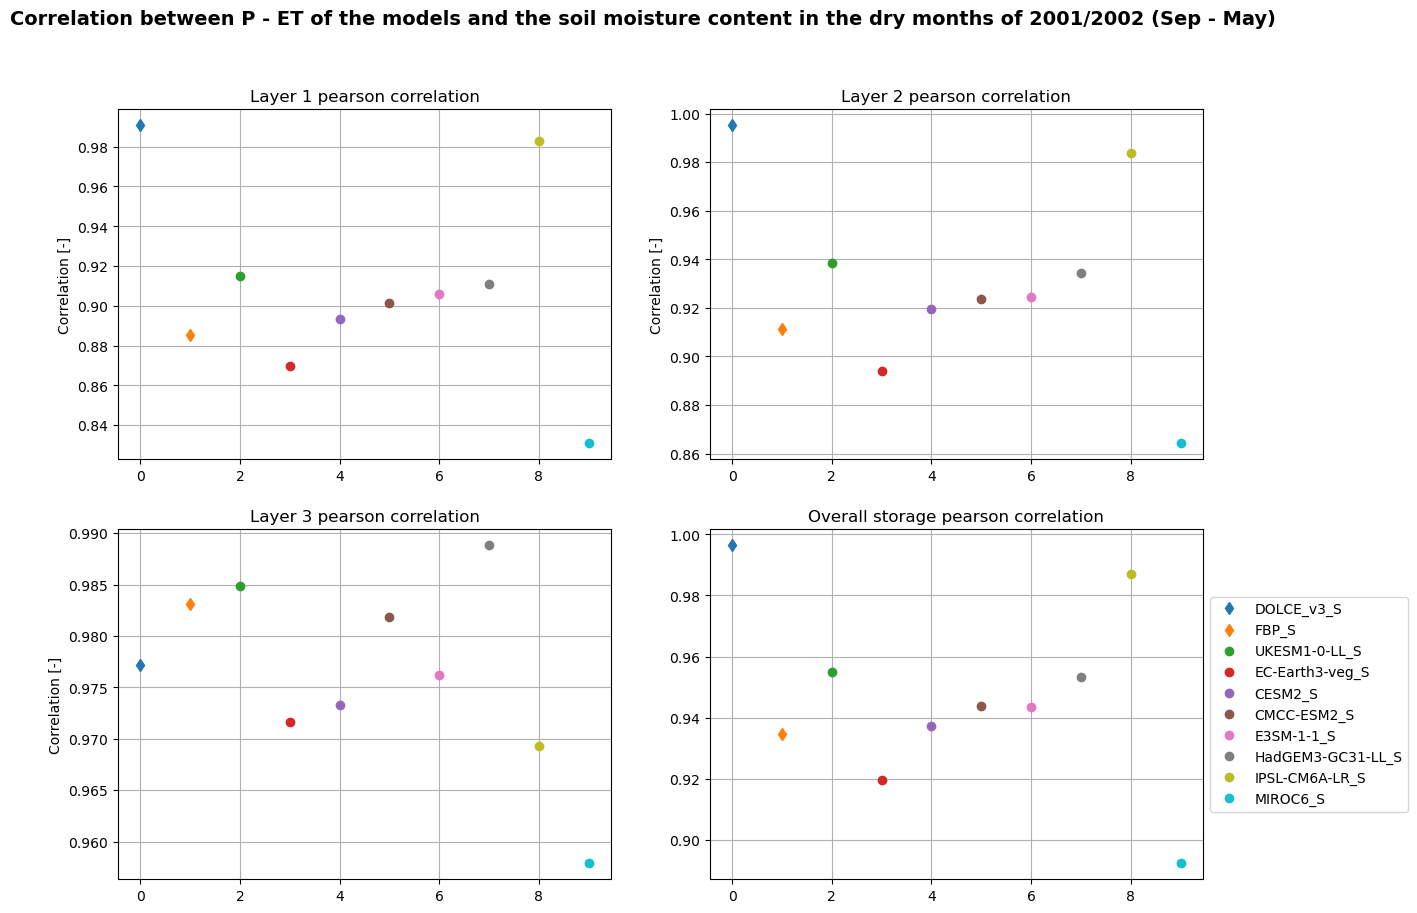

In [29]:
plt.figure(figsize = (14 , 10))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S)):
    x = S1[i][8:16]
    y = L1[8:16]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][8:16]
    y = L2[8:16]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][8:16]
    y = L3[8:16]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S1[i][8:16]
    y = Storage[8:16]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content in the dry months of 2001/2002 (Sep - May)' , fontsize = 14 ,fontweight = 'bold');

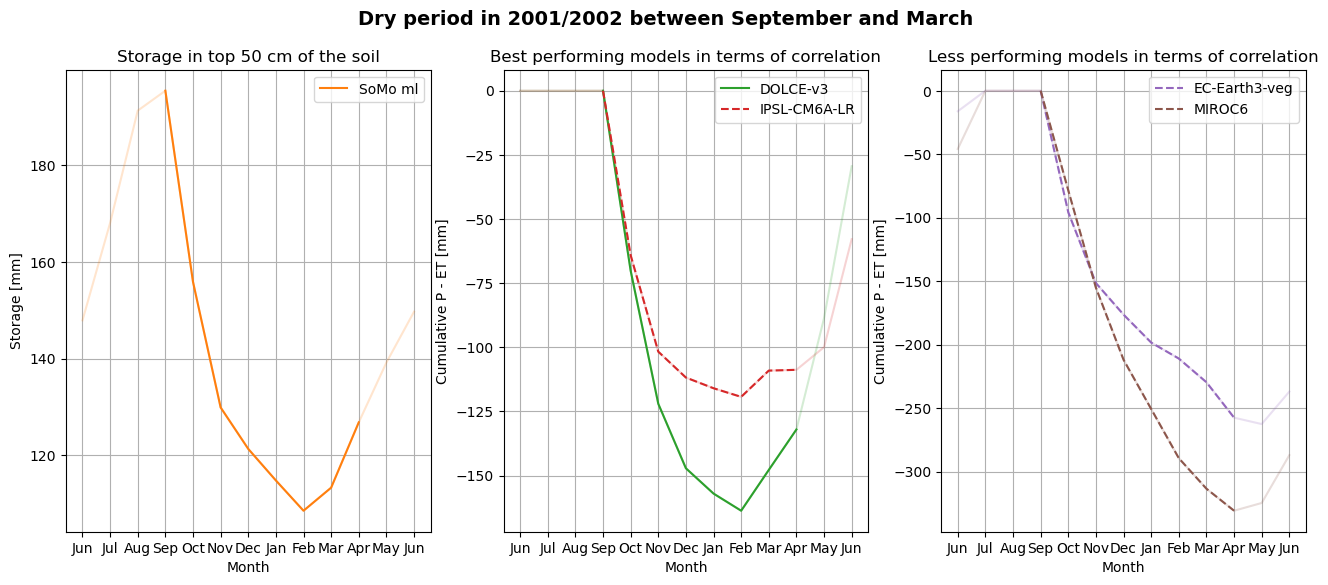

In [30]:
plt.figure(figsize = (16 , 6))

plt.subplot(131)
plt.plot(Storage[5:18] , color = 'C1' , alpha = 0.2)
plt.plot([3 , 4 , 5 , 6 , 7 , 8, 9 , 10] , Storage[8:16] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S1_DOLCE_v3[5:18] , color = 'C2' , alpha = 0.2)
plt.plot(S1_IPSL_CM6A_LR[5:18] , color = 'C3' , alpha = 0.2)
plt.plot([3 ,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_DOLCE_v3[8:16] , color = 'C2' , label = 'DOLCE-v3')
plt.plot([3,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_IPSL_CM6A_LR[8:16] , color = 'C3' , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
plt.title('Best performing models in terms of correlation')
plt.ylabel('Cumulative P - ET [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.grid()
plt.legend()

plt.subplot(133)

plt.plot(S1_EC_Earth3_veg[5:18] , color = 'C4' , alpha = 0.2)
plt.plot(S1_MIROC6[5:18] , color = 'C5' , alpha = 0.2)
plt.plot([3,4 , 5 , 6 , 7 , 8 , 9 , 10] , S1_EC_Earth3_veg[8:16] , color = 'C4' , label = 'EC-Earth3-veg' , linestyle = 'dashed')
plt.plot([3,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_MIROC6[8:16] , color = 'C5' , label = 'MIROC6' , linestyle = 'dashed')
plt.title('Less performing models in terms of correlation')
plt.ylabel('Cumulative P - ET [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2001/2002 between September and March', fontsize = 14 ,fontweight = 'bold');
print()

In [31]:
"""For the year 2007/2008"""

'For the year 2007/2008'

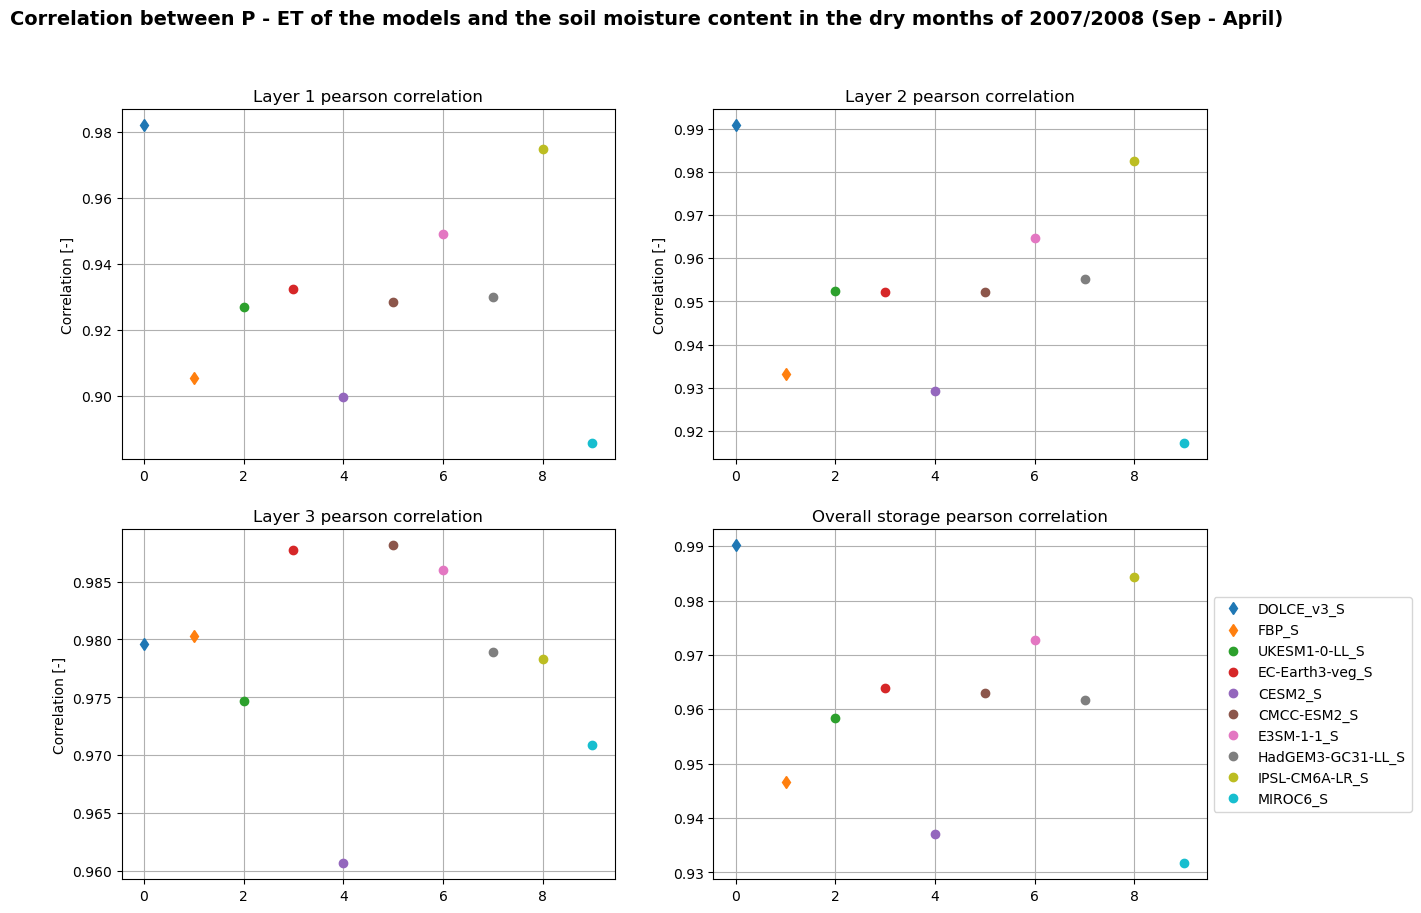

In [32]:
plt.figure(figsize = (14 , 10))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']

for i in range(len(S1)):
    x = S1[i][80:88]
    y = L1[80:88]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(221)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][80:88]
    y = L2[80:88]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(222)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = marker[i] , label = label[i])
    x = S1[i][80:88]
    y = L3[80:88]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(223)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] ,linestyle = (0 , (0 , 100)) , marker = marker[i] , label = label[i])
    x = S1[i][80:88]
    y = Storage[80:88]
    pearsonr = scipy.stats.pearsonr(x, y)
    spearmanr = scipy.stats.spearmanr(x, y)
    kendalltau = scipy.stats.kendalltau(x, y)
    plt.subplot(224)
    plt.plot(i , pearsonr[0] , marker = marker[i] , linestyle = (0 , (0 , 100)) , label = label[i])
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(221)
plt.title('Layer 1 pearson correlation')
plt.grid()
plt.subplot(222)
plt.title('Layer 2 pearson correlation')
plt.grid()
plt.subplot(223)
plt.title('Layer 3 pearson correlation')
plt.grid()
plt.subplot(224)
plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Correlation between P - ET of the models and the soil moisture content in the dry months of 2007/2008 (Sep - April)' , fontsize = 14 ,fontweight = 'bold');

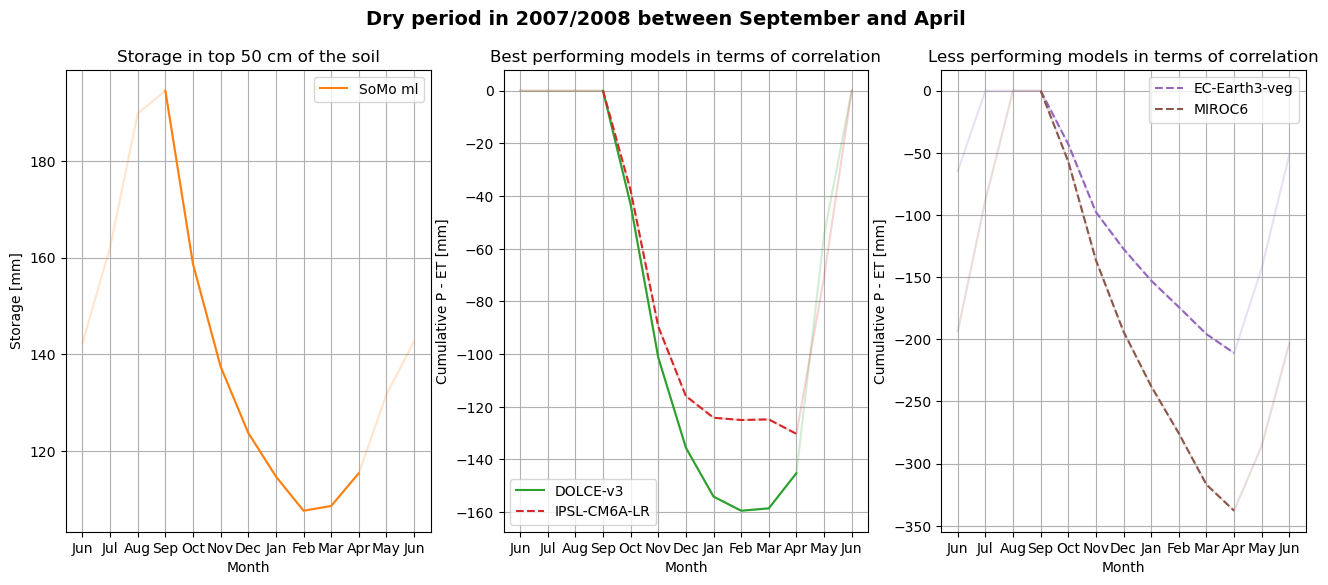

In [33]:
plt.figure(figsize = (16 , 6))

plt.subplot(131)
plt.plot(Storage[77:90] , color = 'C1' , alpha = 0.2)
plt.plot([3 , 4 , 5 , 6 , 7 , 8, 9 , 10] , Storage[80:88] , color = 'C1' , label = 'SoMo ml')
plt.title('Storage in top 50 cm of the soil')
plt.xlabel('Month')
plt.ylabel('Storage [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(S1_DOLCE_v3[77:90] , color = 'C2' , alpha = 0.2)
plt.plot(S1_IPSL_CM6A_LR[77:90] , color = 'C3' , alpha = 0.2)
plt.plot([3 ,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_DOLCE_v3[80:88] , color = 'C2' , label = 'DOLCE-v3')
plt.plot([3,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_IPSL_CM6A_LR[80:88] , color = 'C3' , label = 'IPSL-CM6A-LR' , linestyle = 'dashed')
plt.title('Best performing models in terms of correlation')
plt.ylabel('Cumulative P - ET [mm]')
plt.xlabel('Month')
#plt.ylim(0.1 , -1.8)
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.grid()
plt.legend()

plt.subplot(133)

plt.plot(S1_FBP[77:90] , color = 'C4' , alpha = 0.2)
plt.plot(S1_MIROC6[77:90] , color = 'C5' , alpha = 0.2)
plt.plot([3,4 , 5 , 6 , 7 , 8 , 9 , 10] , S1_FBP[80:88] , color = 'C4' , label = 'EC-Earth3-veg' , linestyle = 'dashed')
plt.plot([3,4 , 5 , 6 , 7 , 8, 9 , 10] , S1_MIROC6[80:88] , color = 'C5' , label = 'MIROC6' , linestyle = 'dashed')
plt.title('Less performing models in terms of correlation')
plt.ylabel('Cumulative P - ET [mm]')
plt.xticks([0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11 , 12] , ['Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec' , 'Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun'])
plt.xlabel('Month')
plt.grid()
plt.legend();

plt.suptitle('Dry period in 2007/2008 between September and April', fontsize = 14 ,fontweight = 'bold');
print()

In [34]:
#All dry months Sep - Mar

Months = np.arange(8 , 120 , 12)
ADM = np.zeros(7*9)

for j in range(7):
    ADM[j] = Storage[Months[0] + j]
    ADM[j + 7] = Storage[Months[1] + j]
    ADM[j + 14] = Storage[Months[2] + j]
    ADM[j + 21] = Storage[Months[3] + j]
    ADM[j + 28] = Storage[Months[4] + j]
    ADM[j + 35] = Storage[Months[5] + j]
    ADM[j + 42] = Storage[Months[6] + j]
    ADM[j + 49] = Storage[Months[7] + j]
    ADM[j + 56] = Storage[Months[8] + j]

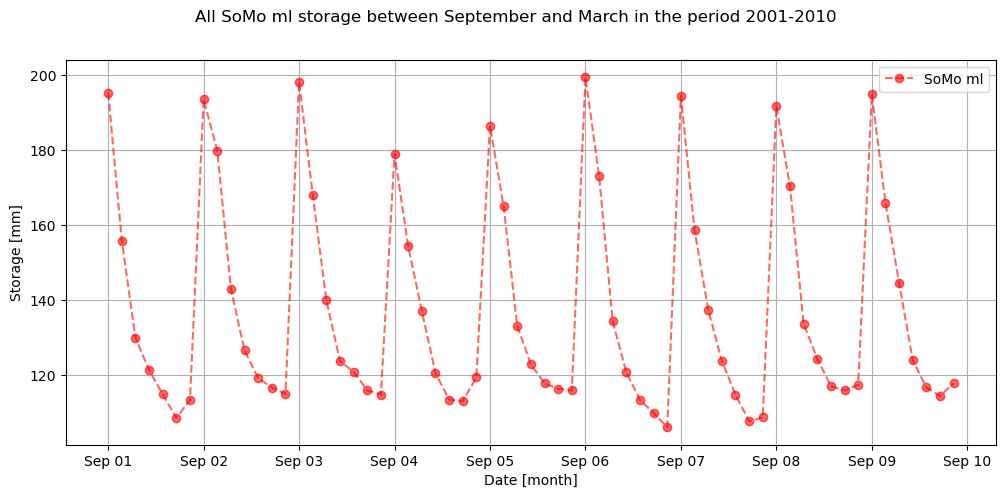

In [35]:
plt.figure(figsize = (12 , 5))
plt.plot(ADM , 'ro--' , alpha = 0.6 , label = 'SoMo ml')
plt.xlabel('Date [month]')
plt.ylabel('Storage [mm]')
plt.suptitle('All SoMo ml storage between September and March in the period 2001-2010')
plt.grid()
plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 , 56 , 63],['Sep 01' , 'Sep 02' , 'Sep 03' , 'Sep 04'  , 'Sep 05' , 'Sep 06' , 'Sep 07' , 'Sep 08' , 'Sep 09' , 'Sep 10'])
plt.legend();

In [36]:
"""Extracting the dry months from the storage"""

ADM_index = [8 , 9 , 10 , 11 , 12 , 13 , 14 , 20 , 21 , 22 , 23 , 24 , 25 , 26 , 
             32 , 33, 34 , 35 , 36 , 37 , 38 , 44 , 45 , 46 , 47  , 48 , 49, 50 , 
             56 , 57 , 58 , 59 , 60 , 61 , 62 , 68 , 69 , 70 , 71 , 72 , 73 , 74 , 
             80 , 81 , 82 , 83 , 84 , 85 ,86  , 92 , 93 , 94 , 95 , 96 , 97 , 98 ,
             104 , 105 , 106 , 107 , 108 , 109 , 110]

t = len(ADM_index)

ADM1_LFE = np.zeros(t)
ADM1_DOLCE_v3 = np.zeros(t)
ADM1_FBP = np.zeros(t)
ADM1_UKEMS1_0_LL = np.zeros(t)
ADM1_EC_Earth3_veg = np.zeros(t)
ADM1_UKESM1_0_LL = np.zeros(t)
ADM1_CESM2 = np.zeros(t)
ADM1_CMCC_ESM2 = np.zeros(t)
ADM1_E3SM_1_1 = np.zeros(t)
ADM1_HadGEM3_GC31_LL = np.zeros(t)
ADM1_IPSL_CM6A_LR = np.zeros(t)
ADM1_MIROC6 = np.zeros(t)

for i in range(t):
    ADM1_DOLCE_v3[i] = S1_DOLCE_v3[ADM_index[i]]
    ADM1_FBP[i] = S1_FBP[ADM_index[i]]
    ADM1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[ADM_index[i]]
    ADM1_EC_Earth3_veg[i] = S1_EC_Earth3_veg[ADM_index[i]]
    ADM1_CESM2[i] = S1_CESM2[ADM_index[i]]
    ADM1_CMCC_ESM2[i] =  S1_CMCC_ESM2[ADM_index[i]]
    ADM1_E3SM_1_1[i] = S1_E3SM_1_1[ADM_index[i]]
    ADM1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[ADM_index[i]]
    ADM1_IPSL_CM6A_LR[i] =   S1_IPSL_CM6A_LR[ADM_index[i]]
    ADM1_MIROC6[i] =  S1_MIROC6[ADM_index[i]]

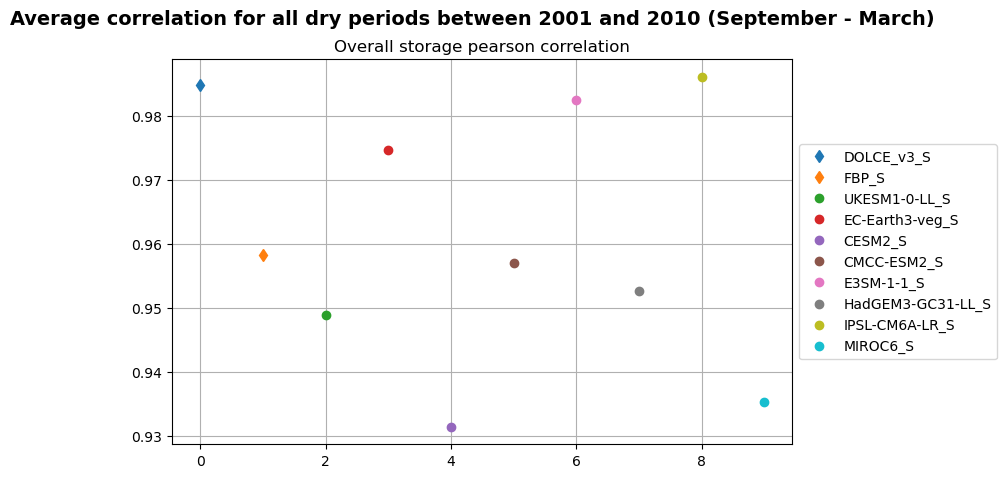

In [37]:
plt.figure(figsize = (8, 5))

label = ['DOLCE_v3_S' , 'FBP_S' ,'UKESM1-0-LL_S' , 'EC-Earth3-veg_S' , 'CESM2_S' , 'CMCC-ESM2_S' , 'E3SM-1-1_S' , 'HadGEM3-GC31-LL_S' , 'IPSL-CM6A-LR_S' , 'MIROC6_S']
ADM1 = [ADM1_DOLCE_v3 , ADM1_FBP  , ADM1_UKESM1_0_LL , ADM1_EC_Earth3_veg , ADM1_CESM2 , ADM1_CMCC_ESM2 , ADM1_E3SM_1_1 , ADM1_HadGEM3_GC31_LL , ADM1_IPSL_CM6A_LR , ADM1_MIROC6]

b3 = np.arange(0 , 63 , 7)
b4 = np.arange(7 , 70 , 7)
p = np.zeros(len(ADM1))

for j in range(len(ADM1)):
    for i in range(len(b3)):
        x = ADM[b3[i]:b4[i]]
        y = ADM1[j][b3[i]:b4[i]]
        pearsonr = scipy.stats.pearsonr(x, y)
        p[j] += pearsonr[0]
    plt.plot(j , p[j]/len(b3) , marker = marker[j] , label = label[j] , linestyle = (0 , (0 , 100)))
    

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Overall storage pearson correlation')
plt.grid()

plt.suptitle('Average correlation for all dry periods between 2001 and 2010 (September - March)' , fontsize = 14 ,fontweight = 'bold');

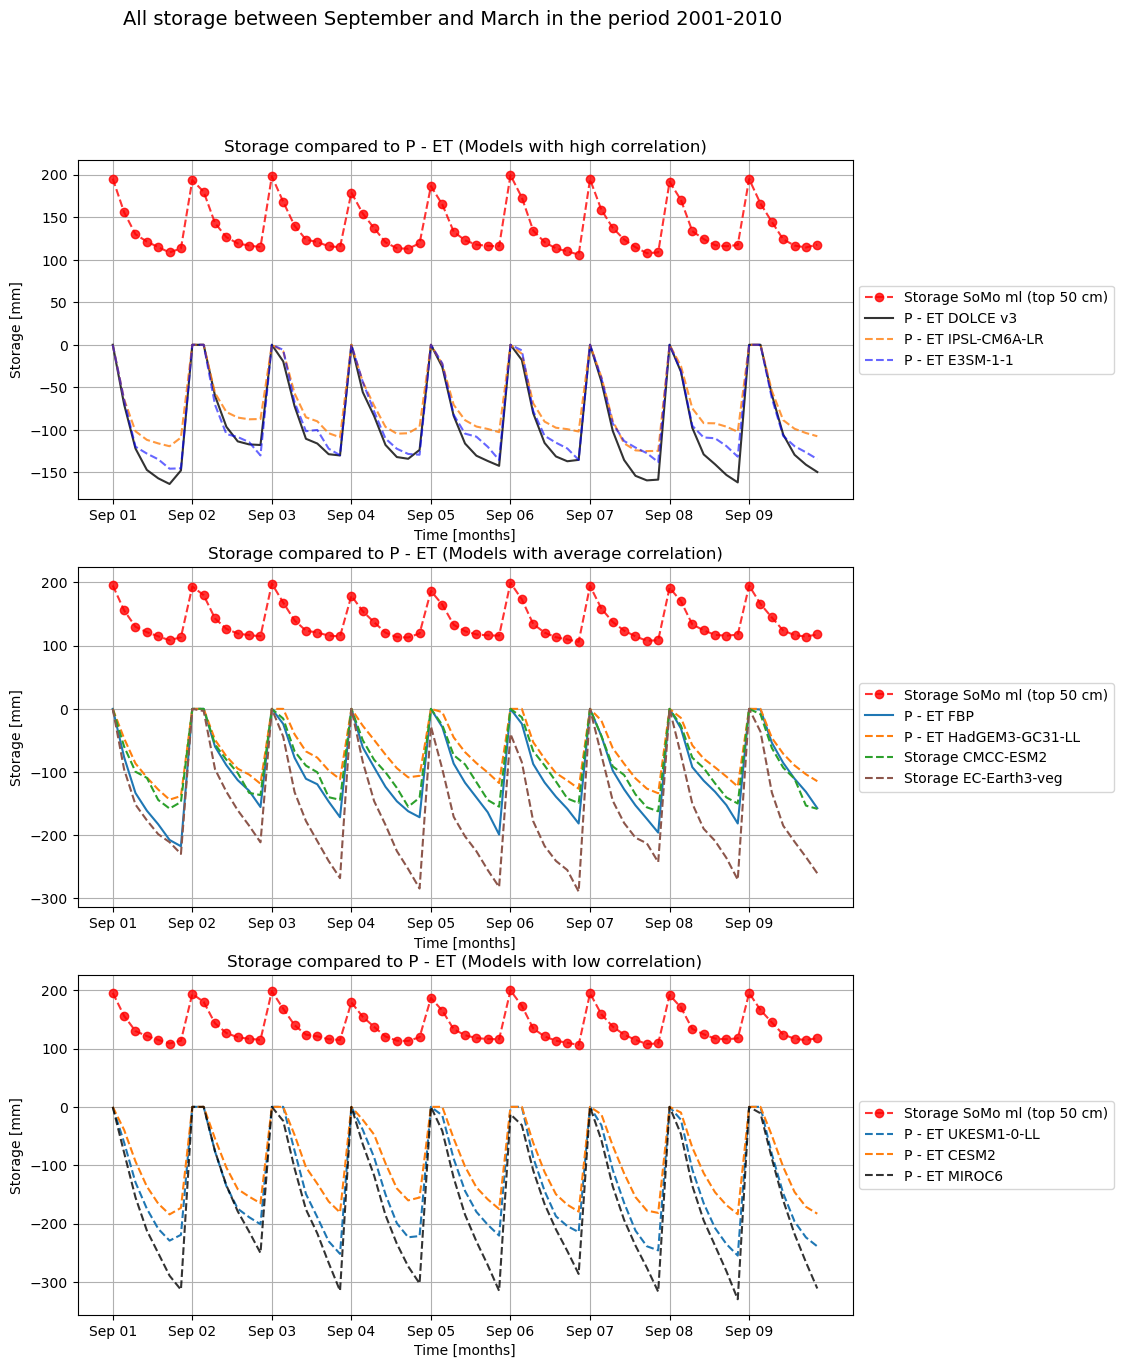

In [38]:
"""High"""

plt.figure(figsize = (10 , 15))
plt.suptitle('All storage between September and March in the period 2001-2010' , fontsize = 14)
plt.subplot(311)
plt.ylabel('Storage [mm]')
plt.plot(ADM , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(ADM1_DOLCE_v3 , color = 'k' , alpha = 0.8  , label = 'P - ET DOLCE v3' )
plt.plot(ADM1_IPSL_CM6A_LR , linestyle = 'dashed' , color = 'C1' , alpha = 0.8  , label = 'P - ET IPSL-CM6A-LR' )
plt.plot(ADM1_E3SM_1_1 , label = 'P - ET E3SM-1-1' , linestyle = 'dashed' , color = 'blue' , alpha = 0.6)
plt.xlabel('Time [months]')
plt.title('Storage compared to P - ET (Models with high correlation)')
plt.grid()
plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 ,56],['Sep 01' , 'Sep 02' , 'Sep 03' , 'Sep 04'  , 'Sep 05' , 'Sep 06' , 'Sep 07' , 'Sep 08' , 'Sep 09'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

"""Average"""

plt.subplot(312)
plt.ylabel('Storage [mm]')
plt.plot(ADM , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(ADM1_FBP , label = 'P - ET FBP')
plt.plot(ADM1_HadGEM3_GC31_LL , label = 'P - ET HadGEM3-GC31-LL', linestyle = 'dashed')
plt.plot(ADM1_CMCC_ESM2 , label = 'Storage CMCC-ESM2', linestyle = 'dashed')
plt.plot(ADM1_EC_Earth3_veg , label = 'Storage EC-Earth3-veg', linestyle = 'dashed' , color = 'C5')

plt.xlabel('Time [months]')
plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 ,56],['Sep 01' , 'Sep 02' , 'Sep 03' , 'Sep 04'  , 'Sep 05' , 'Sep 06' , 'Sep 07' , 'Sep 08' , 'Sep 09'])
plt.title('Storage compared to P - ET (Models with average correlation)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

"""Low"""

plt.subplot(313)
plt.ylabel('Storage [mm]')
plt.plot(ADM , 'ro--' , alpha = 0.8 , label = 'Storage SoMo ml (top 50 cm)')
plt.plot(ADM1_UKESM1_0_LL , label = 'P - ET UKESM1-0-LL' , linestyle = 'dashed')
plt.plot(ADM1_CESM2 , label = 'P - ET CESM2', linestyle = 'dashed')
plt.plot(ADM1_MIROC6 , linestyle = 'dashed' , color = 'k' , alpha = 0.8  , label = 'P - ET MIROC6' )

plt.xlabel('Time [months]')
plt.xticks( [0 , 7 , 14 , 21 , 28 , 35 , 42 , 49 ,56],['Sep 01' , 'Sep 02' , 'Sep 03' , 'Sep 04'  , 'Sep 05' , 'Sep 06' , 'Sep 07' , 'Sep 08' , 'Sep 09'])
plt.title('Storage compared to P - ET (Models with low correlation)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [39]:
print(f'The maximum decrease in storage between Autumn 2001 and Spring 2002')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[0] - S1_MIROC6[15]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[0] - S1_EC_Earth3_veg[16]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[0] - S1_UKESM1_0_LL[13]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[0] - S1_CESM2[13]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[0] - S1_E3SM_1_1[15]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[0] - S1_CMCC_ESM2[15]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {S1_HadGEM3_GC31_LL[0] - S1_HadGEM3_GC31_LL[13]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[0] - S1_IPSL_CM6A_LR[13]:.3f} mm' , 'green'))
print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[0] - S1_FBP[15]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[0] - S1_DOLCE_v3[13]:.3f} mm' , 'green'))
print('----' * 24)
print()
print(f'The maximum decrease in storage between Autumn 2007 and Spring 2008')

print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  MIROC6          is equal to:           {S1_MIROC6[80] - S1_MIROC6[87]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           {S1_EC_Earth3_veg[80] - S1_EC_Earth3_veg[87]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           {S1_UKESM1_0_LL[80] - S1_UKESM1_0_LL[86]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CESM2           is equal to:           {S1_CESM2[80] - S1_CESM2[86]:.3f} mm' , 'red'))
print(colored(f'The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           {S1_CMCC_ESM2[80] - S1_CMCC_ESM2[87]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           {S1_E3SM_1_1[80] - S1_E3SM_1_1[87]:.3f} mm' , 'green'))
print(colored(f'The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           {S1_HadGEM3_GC31_LL[80] - S1_HadGEM3_GC31_LL[86]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           {S1_IPSL_CM6A_LR[80] - S1_IPSL_CM6A_LR[87]:.3f} mm' , 'green'))
print('----' * 24)
print(colored(f'The maximum decrease in storage in 2007 for  FBP             is equal to:           {S1_FBP[80] - S1_FBP[87]:.3f} mm' , 'yellow'))
print(colored(f'The maximum decrease in storage in 2007 for  DOLCE v3        is equal to:           {S1_DOLCE_v3[80] - S1_DOLCE_v3[85]:.3f} mm' , 'green'))
print('----' * 24)
print()

The maximum decrease in storage between Autumn 2001 and Spring 2002
------------------------------------------------------------------------------------------------
The maximum decrease in storage in 2007 for  MIROC6          is equal to:           330.727 mm
The maximum decrease in storage in 2007 for  EC_Earth3_veg   is equal to:           262.484 mm
The maximum decrease in storage in 2007 for  UKESM1_0_LL     is equal to:           229.243 mm
The maximum decrease in storage in 2007 for  CESM2           is equal to:           184.270 mm
The maximum decrease in storage in 2007 for  E3SM-1-1        is equal to:           168.448 mm
The maximum decrease in storage in 2007 for  CMCC-ESM2       is equal to:           160.810 mm
The maximum decrease in storage in 2007 for  HadGEM3-GC31-LL is equal to:           143.663 mm
The maximum decrease in storage in 2007 for  IPSL-CM6A-LR    is equal to:           119.344 mm
---------------------------------------------------------------------------

In [40]:
"""Comparing Mrsol to P - ET"""

"""Data"""

home = '/scratch/pdenblaauwen/rootzone/LS3MIP/mrsol/Regions/'

CESM2 = xr.open_dataset(home + 'mrsol_Emon_CESM2_land-hist_r1i1p1f1_2001-2010_WA.nc' , engine = 'netcdf4')
CMCC_ESM2 = xr.open_dataset(home + 'mrsol_Emon_CMCC-ESM2_land-hist_r1i1p1f1_2001-2010_WA.nc' , engine = 'netcdf4')
HadGEM3_GC31_LL = xr.open_dataset(home + 'mrsol_Emon_HadGEM3-GC31-LL_land-hist_r1i1p1f3_2001-2010_WA.nc' , engine = 'netcdf4')
IPSL_CM6A_LR = xr.open_dataset(home + 'mrsol_Emon_IPSL-CM6A-LR_land-hist_r1i1p1f1_2001-2010_WA.nc' , engine = 'netcdf4')
MIROC6 = xr.open_dataset(home + 'mrsol_Emon_MIROC6_land-hist_r1i1p1f1_2001-2010_WA.nc' , engine = 'netcdf4')
UKESM1_0_LL = xr.open_dataset(home + 'mrsol_Emon_UKESM1-0-LL_land-hist_r1i1p1f2_2001-2010_WA.nc' , engine = 'netcdf4')

In [41]:
"""Until max thickness of the layer"""

"""Mrsol"""


t = 120
Mrsol_CESM2_mean = np.zeros(t)
Mrsol_CMCC_ESM2_mean = np.zeros(t)
Mrsol_HadGEM3_GC31_LL_mean = np.zeros(t)
Mrsol_IPSL_CM6A_LR_mean = np.zeros(t)
Mrsol_UKESM1_0_LL_mean = np.zeros(t)
Mrsol_MIROC6_mean = np.zeros(t)

for i in range(t):
    Mrsol_CESM2_mean[i] = CESM2.mrsol[i , 0:20].mean()*20
    Mrsol_CMCC_ESM2_mean[i] = CMCC_ESM2.mrsol[i , 0:9].mean()*15
    Mrsol_HadGEM3_GC31_LL_mean[i] = HadGEM3_GC31_LL.mrsol[i , 0:4].mean() * 4
    Mrsol_IPSL_CM6A_LR_mean[i] = IPSL_CM6A_LR.mrsol[i , 0:11].mean() * 11
    Mrsol_MIROC6_mean[i] = MIROC6.mrsol[i , 0:6].mean() * 6
    Mrsol_UKESM1_0_LL_mean[i] = UKESM1_0_LL.mrsol[i , 0:4].mean() * 4

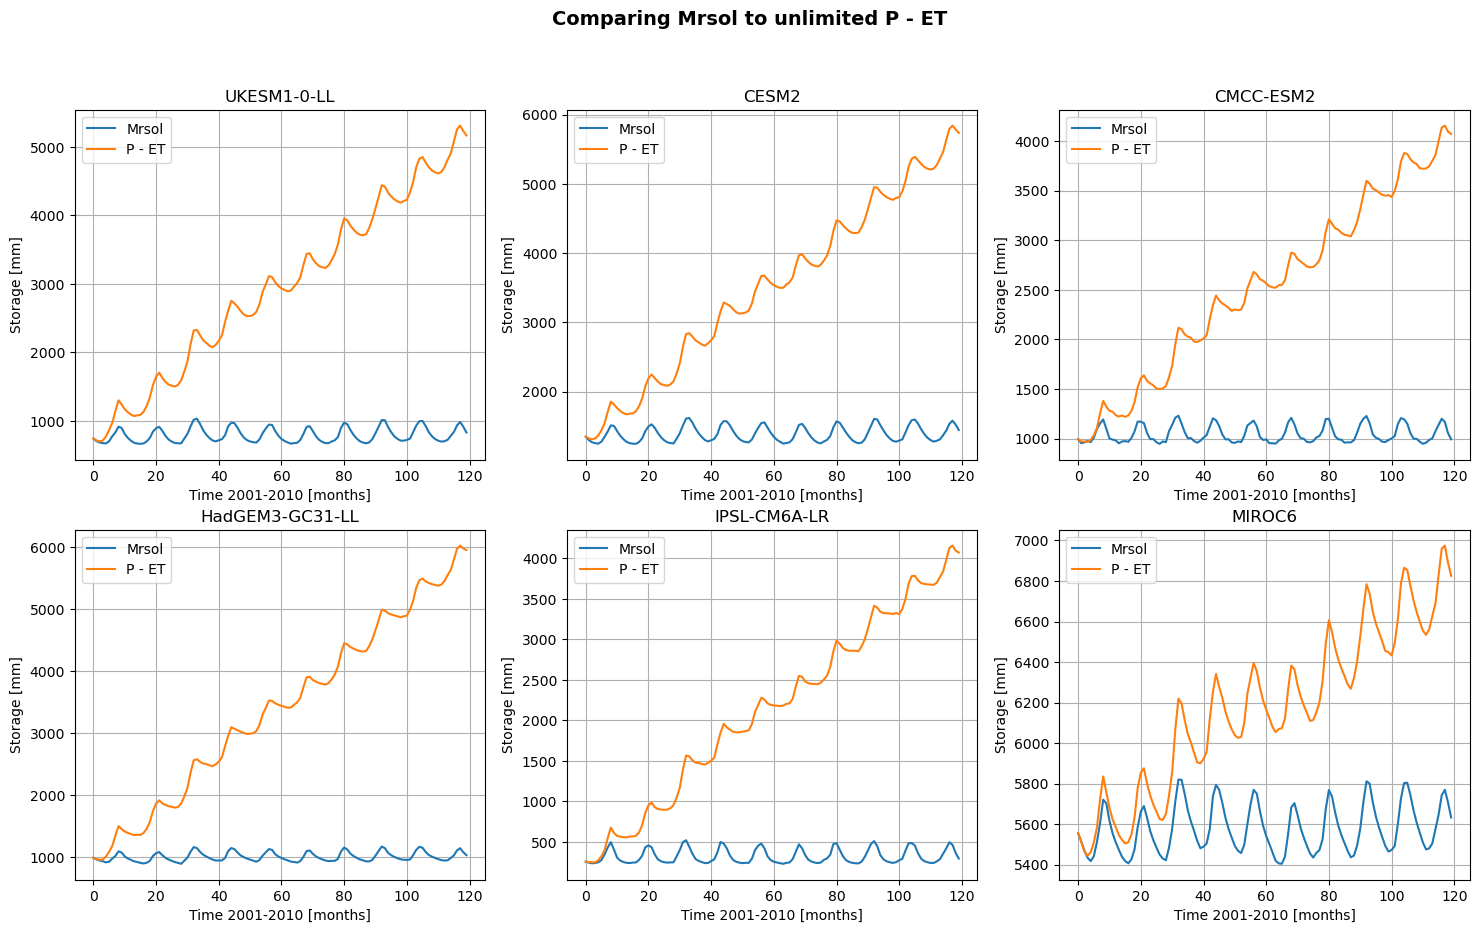

In [42]:
"""Storage"""

#At t = 0 setting the storage even with the mrsol data


t = 120

S1_UKEMS1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    S1_UKESM1_0_LL[0] = Mrsol_UKESM1_0_LL_mean[0]
    S1_CESM2[0] = Mrsol_CESM2_mean[0]
    S1_CMCC_ESM2[0] = Mrsol_CMCC_ESM2_mean[0]
    S1_HadGEM3_GC31_LL[0] = Mrsol_HadGEM3_GC31_LL_mean[0]
    S1_IPSL_CM6A_LR[0] = Mrsol_IPSL_CM6A_LR_mean[0]
    S1_MIROC6[0] = Mrsol_MIROC6_mean[0]
     
label = ['UKESM1-0-LL' , 'CESM2' , 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S1 = [S1_UKESM1_0_LL  , S1_CESM2, S1_CMCC_ESM2 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.ylabel('Storage [mm]')
    plt.xlabel('Time 2001-2010 [months]')
    plt.grid()
    plt.plot(S1[i] , label = 'P - ET')
    
    plt.legend()
    
plt.suptitle('Comparing Mrsol to unlimited P - ET' , fontsize = 14 , fontweight = 'bold');

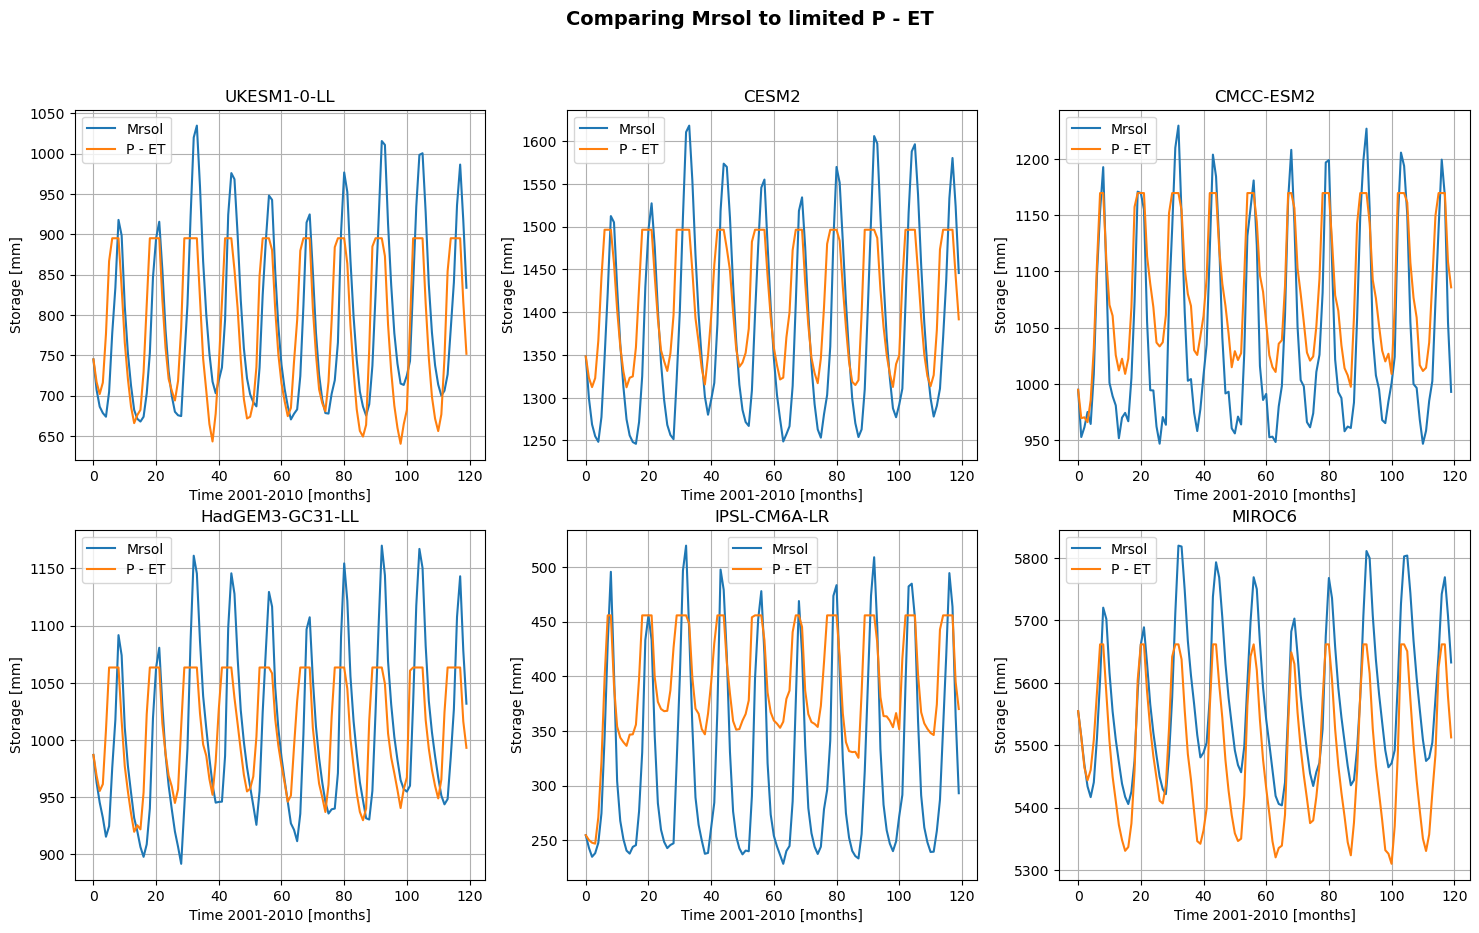

In [43]:
"""P - ET Storage compared to mrsol"""

#At t = 0 setting the storage even with the mrsol data


t = 120

S1_UKEMS1_0_LL = np.zeros(t)
S1_CESM2 = np.zeros(t)
S1_CMCC_ESM2 = np.zeros(t)
S1_HadGEM3_GC31_LL = np.zeros(t)
S1_IPSL_CM6A_LR = np.zeros(t)
S1_MIROC6 = np.zeros(t)

for i in range(t):
    S1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[i - 1] + (P_mean[i] - ET_mean_UKESM1_0_LL[i])
    S1_CESM2[i] = S1_CESM2[i - 1] + (P_mean[i] - ET_mean_CESM2[i])
    S1_CMCC_ESM2[i] = S1_CMCC_ESM2[i - 1] + (P_mean[i] - ET_mean_CMCC_ESM2[i])
    S1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[i - 1] + (P_mean[i] - ET_mean_HadGEM3_GC31_LL[i])
    S1_IPSL_CM6A_LR[i] =  S1_IPSL_CM6A_LR[i - 1] + (P_mean[i] - ET_mean_IPSL_CM6A_LR[i])
    S1_MIROC6[i] = S1_MIROC6[i - 1] + (P_mean[i] - ET_mean_MIROC6[i])
    
    S1_UKESM1_0_LL[0] = Mrsol_UKESM1_0_LL_mean[0]
    S1_CESM2[0] = Mrsol_CESM2_mean[0]
    S1_CMCC_ESM2[0] = Mrsol_CMCC_ESM2_mean[0]
    S1_HadGEM3_GC31_LL[0] = Mrsol_HadGEM3_GC31_LL_mean[0]
    S1_IPSL_CM6A_LR[0] = Mrsol_IPSL_CM6A_LR_mean[0]
    S1_MIROC6[0] = Mrsol_MIROC6_mean[0]
    
    if S1_UKESM1_0_LL[i] > Mrsol_UKESM1_0_LL_mean[20]:
        S1_UKESM1_0_LL[i] = Mrsol_UKESM1_0_LL_mean[20]
    if  S1_CESM2[i] > Mrsol_CESM2_mean[20]:
         S1_CESM2[i] = Mrsol_CESM2_mean[20]
    if  S1_CMCC_ESM2[i] > Mrsol_CMCC_ESM2_mean[20]:
         S1_CMCC_ESM2[i] = Mrsol_CMCC_ESM2_mean[20]
    if S1_HadGEM3_GC31_LL[i] > Mrsol_HadGEM3_GC31_LL_mean[20]:
        S1_HadGEM3_GC31_LL[i] = Mrsol_HadGEM3_GC31_LL_mean[20]
    if S1_IPSL_CM6A_LR[i] > Mrsol_IPSL_CM6A_LR_mean[20]:
        S1_IPSL_CM6A_LR[i] = Mrsol_IPSL_CM6A_LR_mean[20]
    if S1_MIROC6[i] > Mrsol_MIROC6_mean[20]:
        S1_MIROC6[i] = Mrsol_MIROC6_mean[20]
    

label = ['UKESM1-0-LL' , 'CESM2' , 'CMCC-ESM2' , 'HadGEM3-GC31-LL' , 'IPSL-CM6A-LR' , 'MIROC6']
S1 = [S1_UKESM1_0_LL  , S1_CESM2, S1_CMCC_ESM2 , S1_HadGEM3_GC31_LL , S1_IPSL_CM6A_LR , S1_MIROC6]
Mrsol = [Mrsol_UKESM1_0_LL_mean , Mrsol_CESM2_mean , Mrsol_CMCC_ESM2_mean , Mrsol_HadGEM3_GC31_LL_mean , Mrsol_IPSL_CM6A_LR_mean , Mrsol_MIROC6_mean]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.grid()
    plt.ylabel('Storage [mm]')
    plt.xlabel('Time 2001-2010 [months]')
    plt.plot(S1[i] , label = 'P - ET')
    plt.legend()
    
plt.suptitle('Comparing Mrsol to limited P - ET' , fontsize = 14 , fontweight = 'bold');

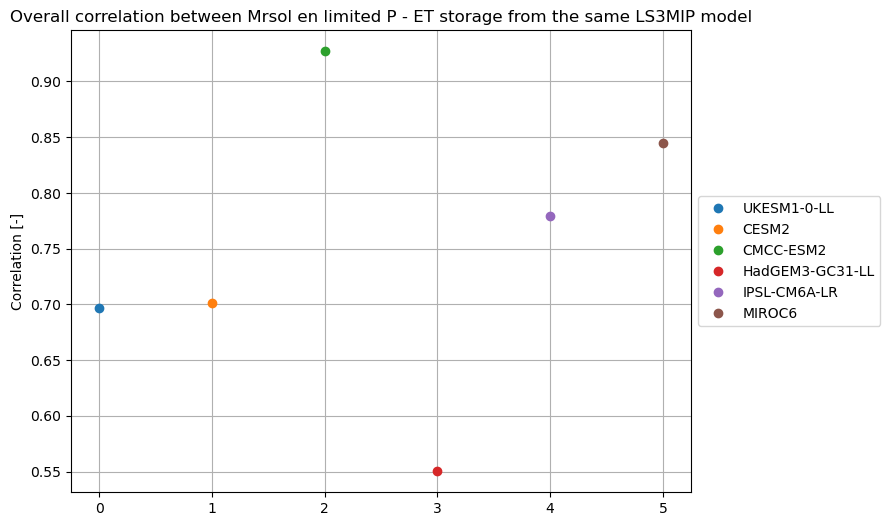

In [44]:
plt.figure(figsize = (8 , 6))

for i in range(len(S1)):
    x = S1[i]
    y = Mrsol[i]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = 'o' , label = label[i] , linestyle = (0 , (0 , 100)))

plt.title('Overall correlation between Mrsol en limited P - ET storage from the same LS3MIP model')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

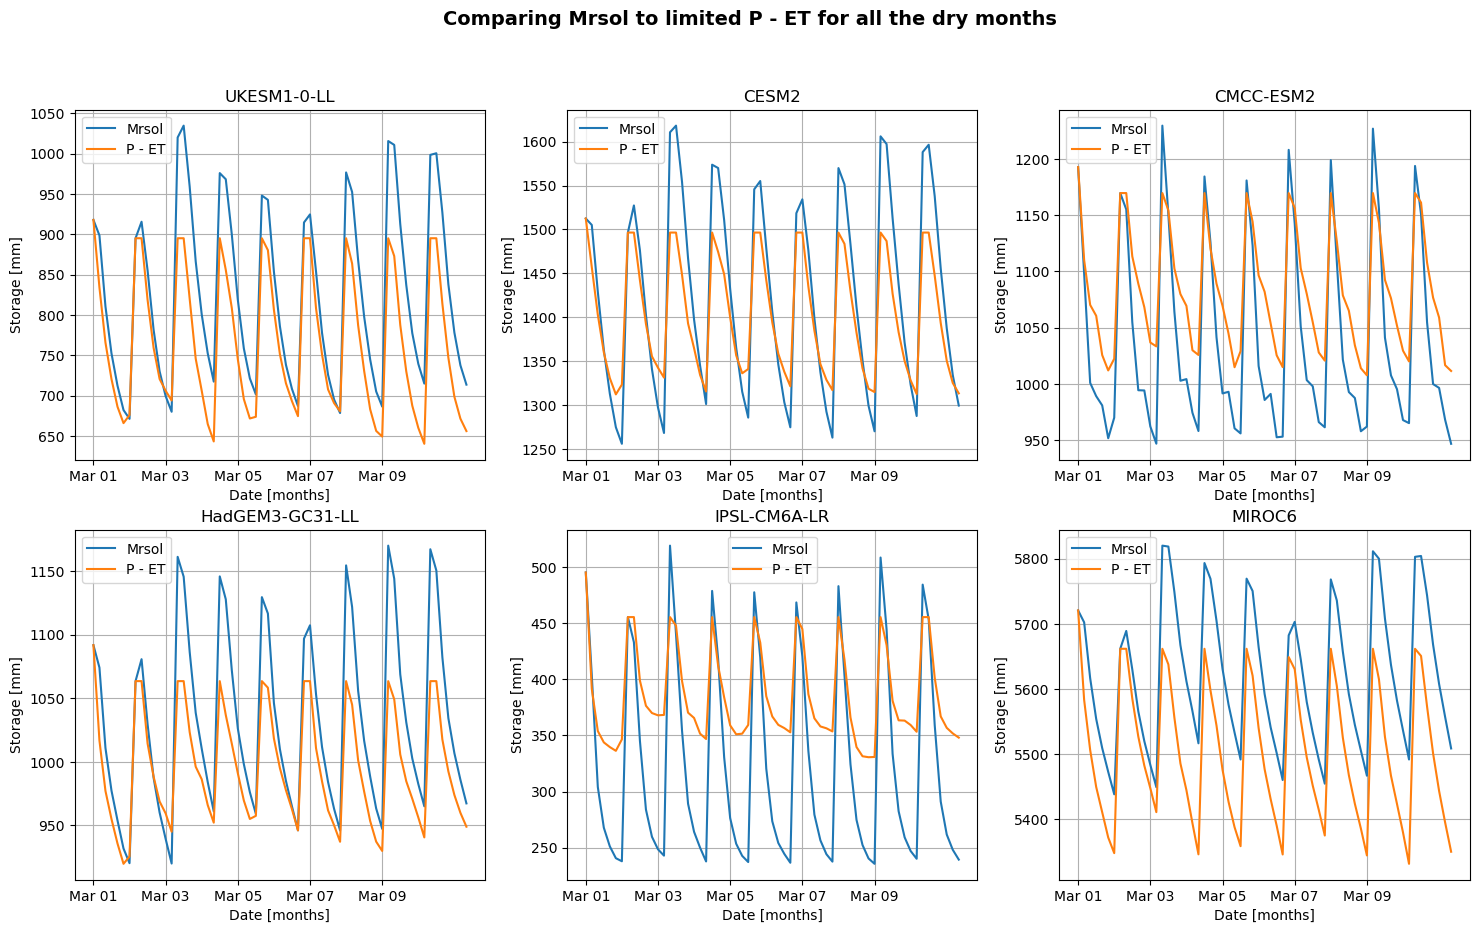

In [45]:
"""Only for the dry months (ET > P)"""

t = len(ADM_index)

Mrsol_ADM1_UKEMS1_0_LL = np.zeros(t)
Mrsol_ADM1_UKESM1_0_LL = np.zeros(t)
Mrsol_ADM1_CESM2 = np.zeros(t)
Mrsol_ADM1_CMCC_ESM2 = np.zeros(t)
Mrsol_ADM1_HadGEM3_GC31_LL = np.zeros(t)
Mrsol_ADM1_IPSL_CM6A_LR = np.zeros(t)
Mrsol_ADM1_MIROC6 = np.zeros(t)

for i in range(t):
    Mrsol_ADM1_UKESM1_0_LL[i] = Mrsol_UKESM1_0_LL_mean[ADM_index[i]]
    Mrsol_ADM1_CESM2[i] = Mrsol_CESM2_mean[ADM_index[i]]
    Mrsol_ADM1_CMCC_ESM2[i] =  Mrsol_CMCC_ESM2_mean[ADM_index[i]]
    Mrsol_ADM1_HadGEM3_GC31_LL[i] = Mrsol_HadGEM3_GC31_LL_mean[ADM_index[i]]
    Mrsol_ADM1_IPSL_CM6A_LR[i] =   Mrsol_IPSL_CM6A_LR_mean[ADM_index[i]]
    Mrsol_ADM1_MIROC6[i] =  Mrsol_MIROC6_mean[ADM_index[i]]
    
    ADM1_UKESM1_0_LL[i] = S1_UKESM1_0_LL[ADM_index[i]]
    ADM1_CESM2[i] = S1_CESM2[ADM_index[i]]
    ADM1_CMCC_ESM2[i] =  S1_CMCC_ESM2[ADM_index[i]]
    ADM1_HadGEM3_GC31_LL[i] = S1_HadGEM3_GC31_LL[ADM_index[i]]
    ADM1_IPSL_CM6A_LR[i] =   S1_IPSL_CM6A_LR[ADM_index[i]]
    ADM1_MIROC6[i] =  S1_MIROC6[ADM_index[i]]
    
    ADM1_UKESM1_0_LL[0] = Mrsol_ADM1_UKESM1_0_LL[0]
    ADM1_CESM2[0] = Mrsol_ADM1_CESM2[0]
    ADM1_CMCC_ESM2[0] = Mrsol_ADM1_CMCC_ESM2[0]
    ADM1_HadGEM3_GC31_LL[0] = Mrsol_ADM1_HadGEM3_GC31_LL[0]
    ADM1_IPSL_CM6A_LR[0] = Mrsol_ADM1_IPSL_CM6A_LR[0]
    ADM1_MIROC6[0] = Mrsol_ADM1_MIROC6[0]
    
S1 = [ADM1_UKESM1_0_LL  , ADM1_CESM2, ADM1_CMCC_ESM2 , ADM1_HadGEM3_GC31_LL , ADM1_IPSL_CM6A_LR , ADM1_MIROC6]
Mrsol = [Mrsol_ADM1_UKESM1_0_LL , Mrsol_ADM1_CESM2 , Mrsol_ADM1_CMCC_ESM2 , Mrsol_ADM1_HadGEM3_GC31_LL , Mrsol_ADM1_IPSL_CM6A_LR , Mrsol_ADM1_MIROC6]
    
plt.figure(figsize = (18 , 10))

for i in range(len(S1)):
    plt.subplot(2 , 3 , i + 1)
    plt.title(label[i])
    plt.plot(Mrsol[i] , label = 'Mrsol')
    plt.xlabel('Date [months]')
    plt.ylabel('Storage [mm]')
    plt.xticks( [0 , 12 , 24 , 36 , 48],['Mar 01' , 'Mar 03'  , 'Mar 05' , 'Mar 07' , 'Mar 09'])
    plt.grid()
    plt.plot(S1[i] , label = 'P - ET')
    plt.legend()
    
plt.suptitle('Comparing Mrsol to limited P - ET for all the dry months' , fontsize = 14 , fontweight = 'bold');

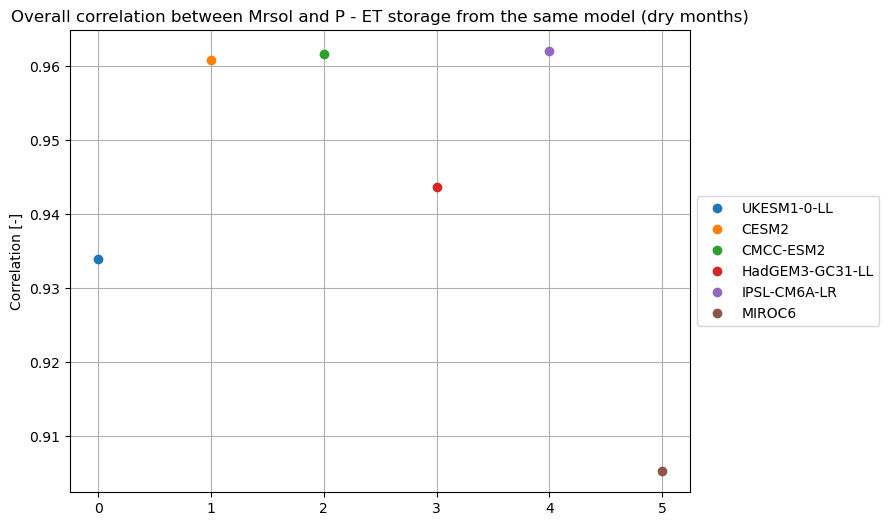

In [46]:
plt.figure(figsize = (8 , 6))

for i in range(len(S1)):
    x = S1[i]
    y = Mrsol[i]
    pearsonr = scipy.stats.pearsonr(x, y)
    plt.ylabel('Correlation [-]')
    plt.plot(i , pearsonr[0] , marker = 'o' , label = label[i] , linestyle = (0 , (0 , 100)))

plt.title('Overall correlation between Mrsol and P - ET storage from the same model (dry months)')
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));